# **Perkenalan**

Grade Challenge 5

- Name : Mohammad Aziz Riza
- Batch : MSIB
- Gambaran Dataset : Dataset yang digunakan yaitu dataset Credit Card. Di mana dataset ini berisi informasi terkait dengan penggunaan kartu kredit seseorang dan apakah pembayaran bulanan mereka akan dianggap sebagai default atau tidak.
- Objective : Membuat model machine learning klasifikasi dengan Logistic Regression, SVM, dan KNN untuk memprediksi default_payment_next_month.

# **Conceptual Problem**

Teks Anda sudah cukup baik, tetapi berikut adalah beberapa penyesuaian kecil untuk meningkatkan kejelasan dan akurasi:

1. **Koefisien pada Regresi Logistik:**
   Koefisien dalam regresi logistik mengukur hubungan antara variabel independen (fitur) dengan log-odds dari probabilitas suatu kejadian. Dalam model regresi logistik, koefisien ini menunjukkan seberapa banyak perubahan dalam log-odds probabilitas kejadian yang terjadi ketika ada satu unit perubahan dalam variabel independen yang terkait, sementara variabel lainnya tetap konstan.

2. **Fungsi Parameter Kernel pada SVM:**
   Kernel dalam SVM adalah fungsi matematis yang digunakan untuk menghitung "similarity" antara dua titik dalam ruang fitur. Ini memungkinkan SVM untuk memproyeksikan data ke dimensi yang lebih tinggi sehingga dapat dipisahkan secara linear. Salah satu kernel yang umum digunakan adalah kernel Gauss (RBF - Radial Basis Function). Kernel Gauss mengukur kemiripan antara dua sampel berdasarkan jarak Euclidean antara mereka dalam ruang fitur.

3. **Cara Memilih K yang Optimal pada KNN:**
   Salah satu cara yang umum digunakan untuk memilih nilai K yang optimal pada KNN adalah dengan menggunakan metode validasi silang (cross-validation). Dalam validasi silang, data dibagi menjadi subset pelatihan dan pengujian secara berulang kali. Untuk setiap iterasi, model KNN dilatih dengan berbagai nilai K dan diuji pada subset pengujian. Nilai K yang memberikan performa terbaik pada pengujian rata-rata dari semua iterasi dipilih sebagai nilai K yang optimal.

4. **Metrics pada Klasifikasi:**
   - **Accuracy (Akurasi):** Mengukur seberapa sering model klasifikasi memberikan prediksi yang benar secara keseluruhan, dinyatakan sebagai persentase dari total prediksi yang benar terhadap total data.
   - **Precision (Presisi):** Mengukur proporsi dari positif yang benar terhadap total yang diprediksi positif. Berguna ketika perlu meminimalkan false positive.
   - **Recall (Recall atau Sensitivitas):** Mengukur proporsi dari positif yang benar terhadap total aktual positif. Berguna ketika perlu meminimalkan false negative.
   - **F1 Score:** Harmonic mean dari precision dan recall. Berguna saat ingin mencari keseimbangan antara precision dan recall.
   
   Metrik yang tepat untuk digunakan tergantung pada kebutuhan spesifik masalah klasifikasi. Misalnya, jika keseimbangan antara false positive dan false negative sangat penting, F1 score dapat digunakan. Jika ingin memastikan seberapa baik model secara keseluruhan, maka akurasi bisa menjadi pilihan. Sedangkan precision dan recall berguna ketika perlu menyesuaikan trade-off antara salah satu jenis kesalahan klasifikasi.

# **Query SQL**

Query : 'SELECT limit_balance, CAST(sex AS INT64) AS sex, CAST(education_level AS INT64) AS education_level, CAST(marital_status AS INT64) AS marital_status, 
age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) AS pay_5, CAST(pay_6 AS FLOAT64) AS pay_6, bill_amt_1, bill_amt_2, bill_amt_3, 
bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS INT64) AS default_payment_next_month 
FROM  `bigquery-public-data.ml_datasets.credit_card_default`'

# **Import Libraries**

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from scipy.stats import pointbiserialr
from sklearn.compose import ColumnTransformer
import scipy.stats as stats

# Modelling 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# Model Evaluation
from sklearn.metrics import roc_auc_score

# For Saving Models
import pickle
import joblib

pd.set_option('display.max_columns', None)

# **Data Loading**

In [146]:
df = pd.read_csv("P1G5_Set_1_mohammad_aziz.csv")
print("---10 Data Pertama---".center(150))
display(df.head(10))
print("---10 Data Terakhir---".center(150))
display(df.tail(10))

                                                                ---10 Data Pertama---                                                                 


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,0,61454,61808,62290,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,0,49221,49599,50942,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,0,19568,19420,15535,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,0,18457,22815,27086,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,0,159919,68686,161192,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,-1,54053,65235,64747,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


                                                                ---10 Data Terakhir---                                                                


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0,0
2956,100000,1,3,1,40,0,0,-1,-1,-2,-2,12878,7702,2377,0,0,0,2000,2377,40000,0,0,0,0
2957,30000,2,3,1,48,1,-1,-1,-2,-2,-2,-100,100,0,0,0,0,200,0,0,0,0,0,0
2958,80000,2,3,1,39,-1,-1,-1,-1,-2,-1,5280,5000,5000,0,0,5000,5000,5000,0,5000,5000,470,0
2959,20000,1,3,2,26,-1,-1,-1,-2,-2,-2,96,780,0,0,0,0,1560,0,0,0,0,0,0
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,-2,4280,2800,0,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,-2,752,300,5880,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,-2,390,390,390,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,-2,1473,390,390,390,390,0,390,390,390,390,0,780,0
2964,290000,2,2,1,39,1,-2,-2,-2,-2,-2,-70,9540,390,3184,390,390,10000,800,3184,390,390,6617,0


In [147]:
df.dtypes

limit_balance                 int64
sex                           int64
education_level               int64
marital_status                int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt_1                    int64
bill_amt_2                    int64
bill_amt_3                    int64
bill_amt_4                    int64
bill_amt_5                    int64
bill_amt_6                    int64
pay_amt_1                     int64
pay_amt_2                     int64
pay_amt_3                     int64
pay_amt_4                     int64
pay_amt_5                     int64
pay_amt_6                     int64
default_payment_next_month    int64
dtype: object

**Insight :** Dataset ini terdiri dari 2965 baris dan 24 kolom dan semua fitur memiliki tipe data yang tepat

In [148]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


**Insight :** Dari informasi di atas beberapa fitur memiliki nilai yang berbeda beda sehingga perlu dilakukan scalling. Beberapa fitur yang termasuk kategori yaitu : `sex, education_level, marital_status, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, dan default_payment_next_month`

# **Exploratory Data Analysis (EDA)**

<ol>
<li>Apakah terdapat missing value? 
<li>Apakah terdapat duplikat data? 
<li>Apakah terdapat outlier?
<li>Apakah product_id dan name sama saja?
<li>Bagaimana distribusi data di setiap fitur bertipe data integer dan float?
<li>Bagaimana korelasi setiap fitur terhadap fitur target(price) untuk fitur fitur numeric

## 1. Apakah terdapat missing value?


In [149]:
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Tidak terdapat missing value pada semua fitur

## 2. Apakah terdapat duplikat data?

In [150]:
df.duplicated().sum()

1

Terdapat 1 data duplikat, sehingga perlu dilakukan drop pada salah satunya

## 3. Bagaimana distribusi pada data?

### Kontinu

In [151]:
col_cat = ['sex','education_level','marital_status','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']
fitur_number = df.drop(columns= col_cat).columns 

highly_skewed = []
moderately_skewed = []
normal_skewed = []

# Perulangan untuk mengecek skewnes masing masing fitur 
for i in df[fitur_number].columns : 
    nilai_skew = df[i].skew() # Hitung skewness
    if nilai_skew < -1 or nilai_skew > 1 : # Jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (nilai_skew >= -1 and nilai_skew <= -0.5) or (nilai_skew <= 1 and nilai_skew >= 0.5) :  # Jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # Jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [152]:
for i in highly_skewed :
    print(i, end=", ")

limit_balance, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7732\1783589925.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['limit_balance'], ax=axes)


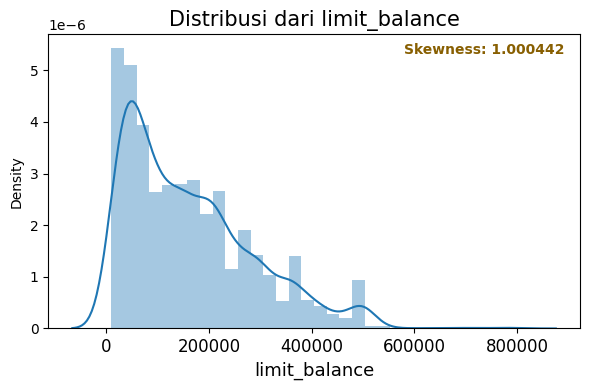

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(6, 4))

# Plot distribusi dari kolom "limit_balance"
sns.distplot(df['limit_balance'], ax=axes)
    
axes.set_title('Distribusi dari limit_balance', fontsize=15, loc='center')
axes.set_xlabel('limit_balance', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  
    
# Tambahkan teks untuk skewness
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['limit_balance'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


Dari contoh pada fitur limit_balance memiliki skew 1.0 yang mengindikasikan fitur berdistribusi tidak normal dan memiliki nilai nilai di sebelah kanan

In [154]:
for i in moderately_skewed :
    print(i, end=", ")

age, 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7732\56925207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax=axes)


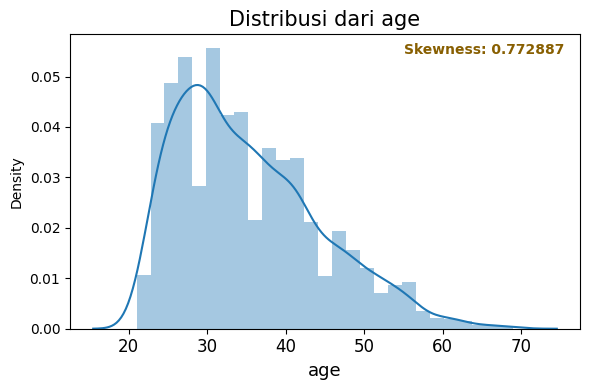

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(6, 4))

# Plot distribusi dari kolom "age"
sns.distplot(df['age'], ax=axes)
    
axes.set_title('Distribusi dari age', fontsize=15, loc='center')
axes.set_xlabel('age', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  
    
# Tambahkan teks untuk skewness
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['age'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


Fitur berdistribusi moderat hanya pada fitur age dengan nilai skew 0.77 mengindikasikan terdapat nilai nilai disebelah kanan

In [156]:
for i in normal_skewed :
    print(i, end=", ")

**Insight :** Fitur fitur yang bernilai kontinu memiliki distribusi yang tidak normal dan memiliki kemungkinan outlier

### Kategori

array([[<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'marital_status'}>],
       [<Axes: title={'center': 'pay_0'}>,
        <Axes: title={'center': 'pay_2'}>,
        <Axes: title={'center': 'pay_3'}>],
       [<Axes: title={'center': 'pay_4'}>,
        <Axes: title={'center': 'pay_5'}>,
        <Axes: title={'center': 'pay_6'}>],
       [<Axes: title={'center': 'default_payment_next_month'}>, <Axes: >,
        <Axes: >]], dtype=object)

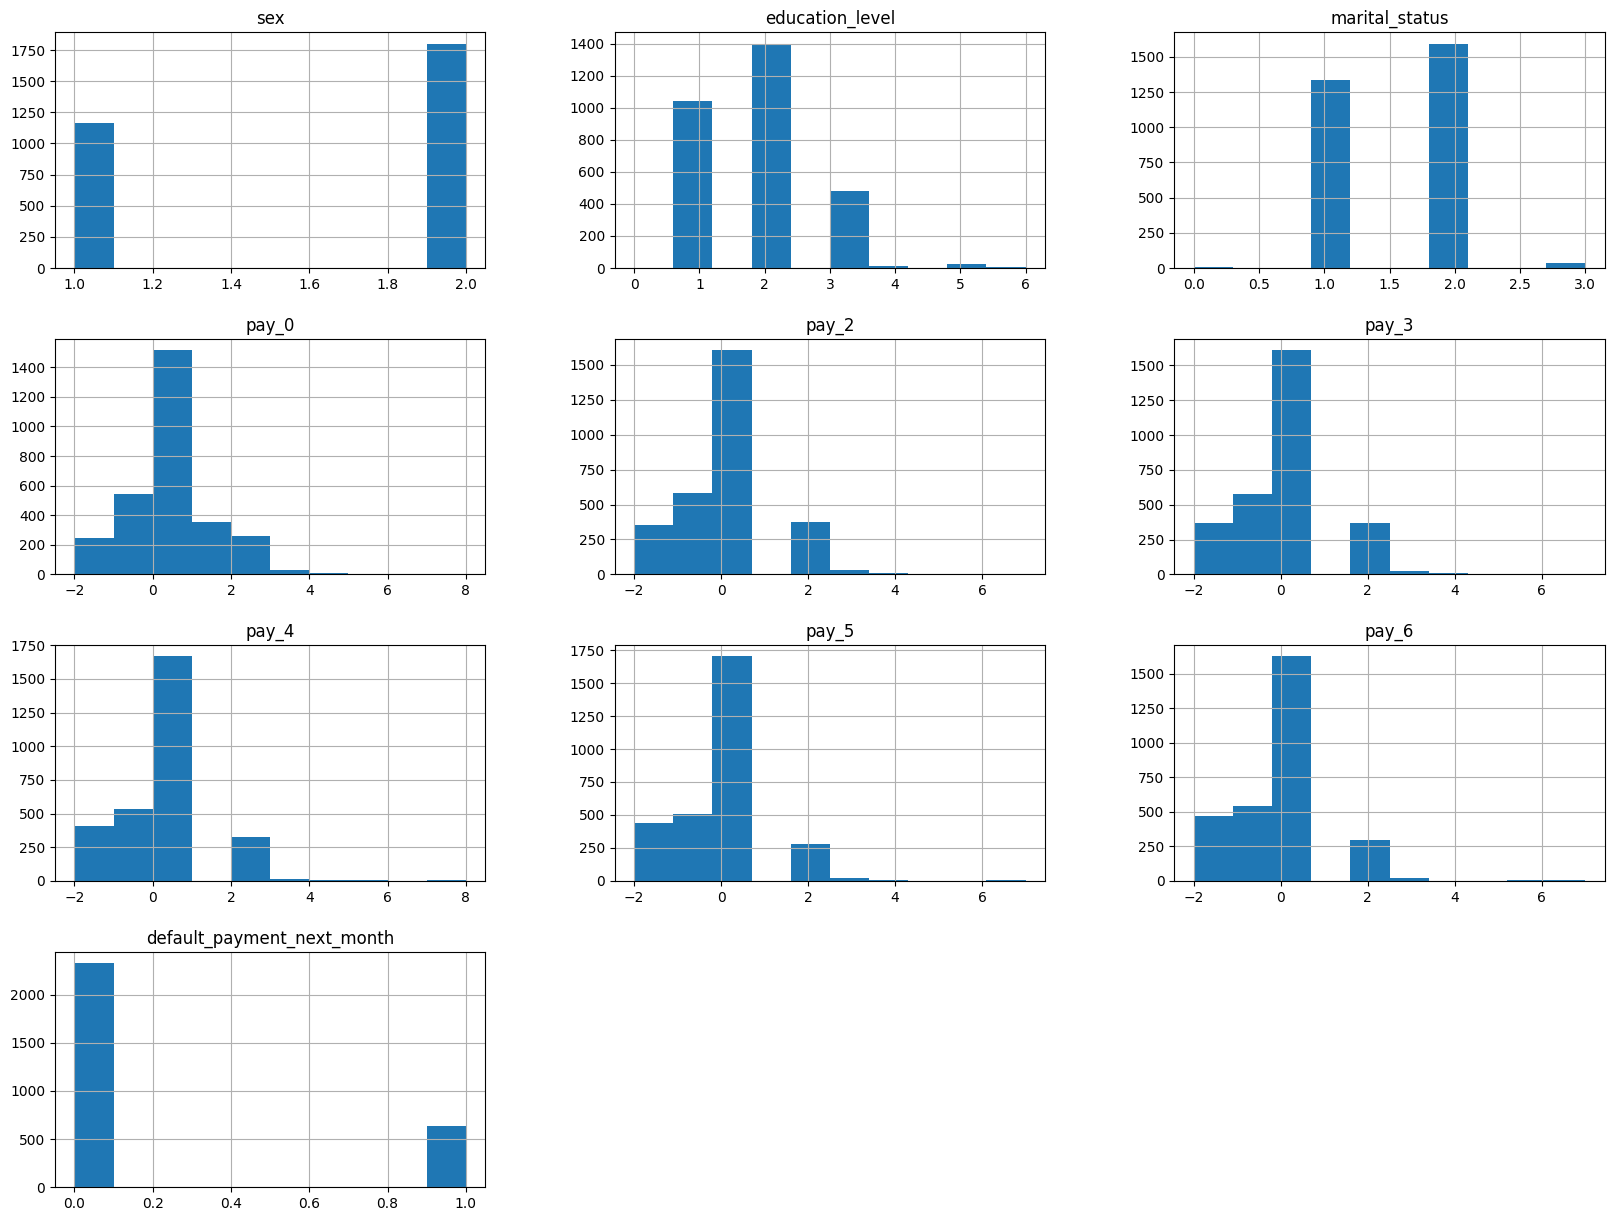

In [157]:
df[col_cat].hist(figsize=(20, 15))

**Insight :** Fitur fitur kategori memiliki frekuensi yang berbeda beda tiap kategori di masing masing fitur, terutama pada fitur target mengindikasikan adanya imbalance dataset. Sehingga pada bagian evaluasi akan lebih baik menggunakan ROC-AUC.

## 4. Apakah terdapat outlier?

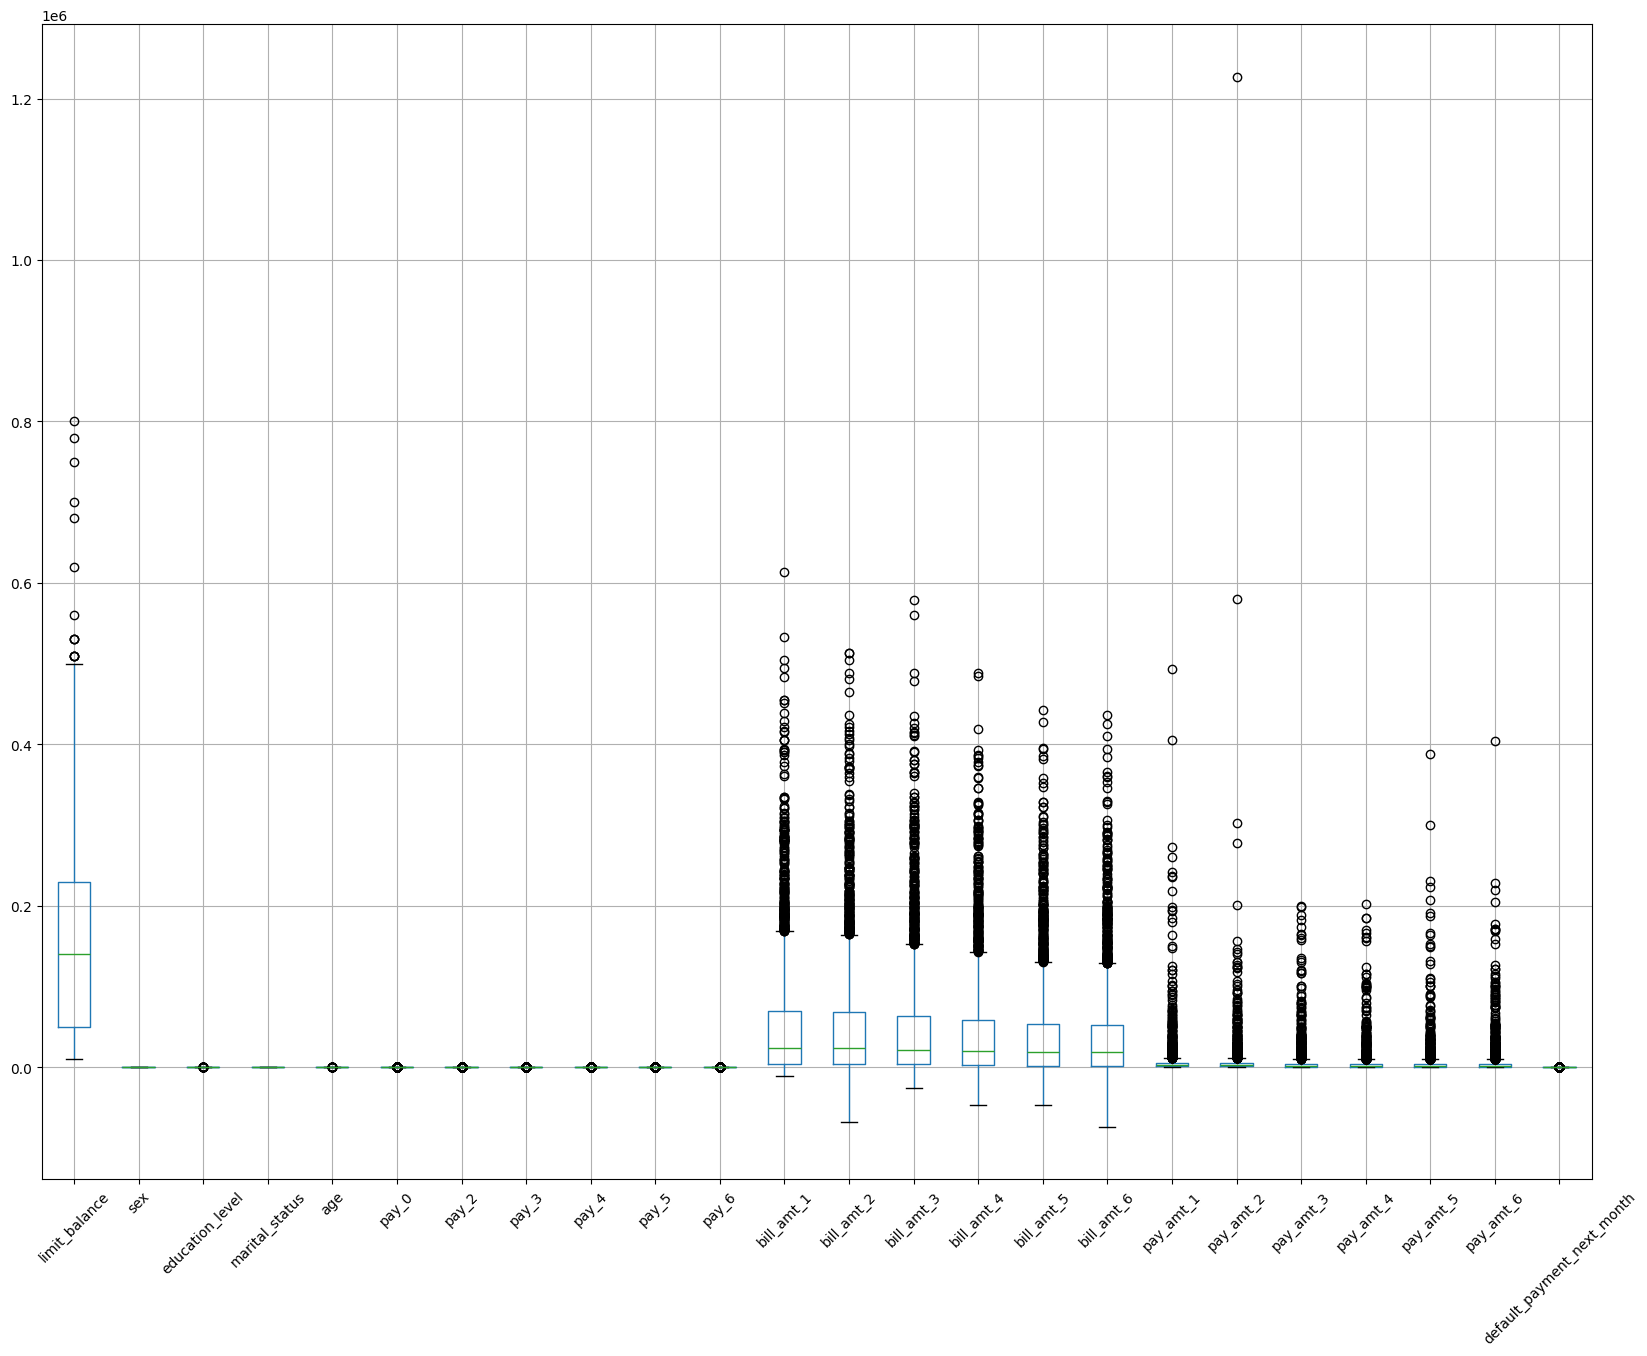

In [158]:
# Membuat boxplot dari DataFrame
plt.figure(figsize=(20, 15))
df.boxplot()
plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat
plt.show()

**Insight :** Hampir semua fitur memiliki outlier, perlu dilakukan handling dengan capping karena kemungkinan outlier terjadi secara alami.

## 4. Korelasi tiap fitur kontinu

In [159]:
col = fitur_number.to_list()
col.append('default_payment_next_month')
col

['limit_balance',
 'age',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month']

<Axes: >

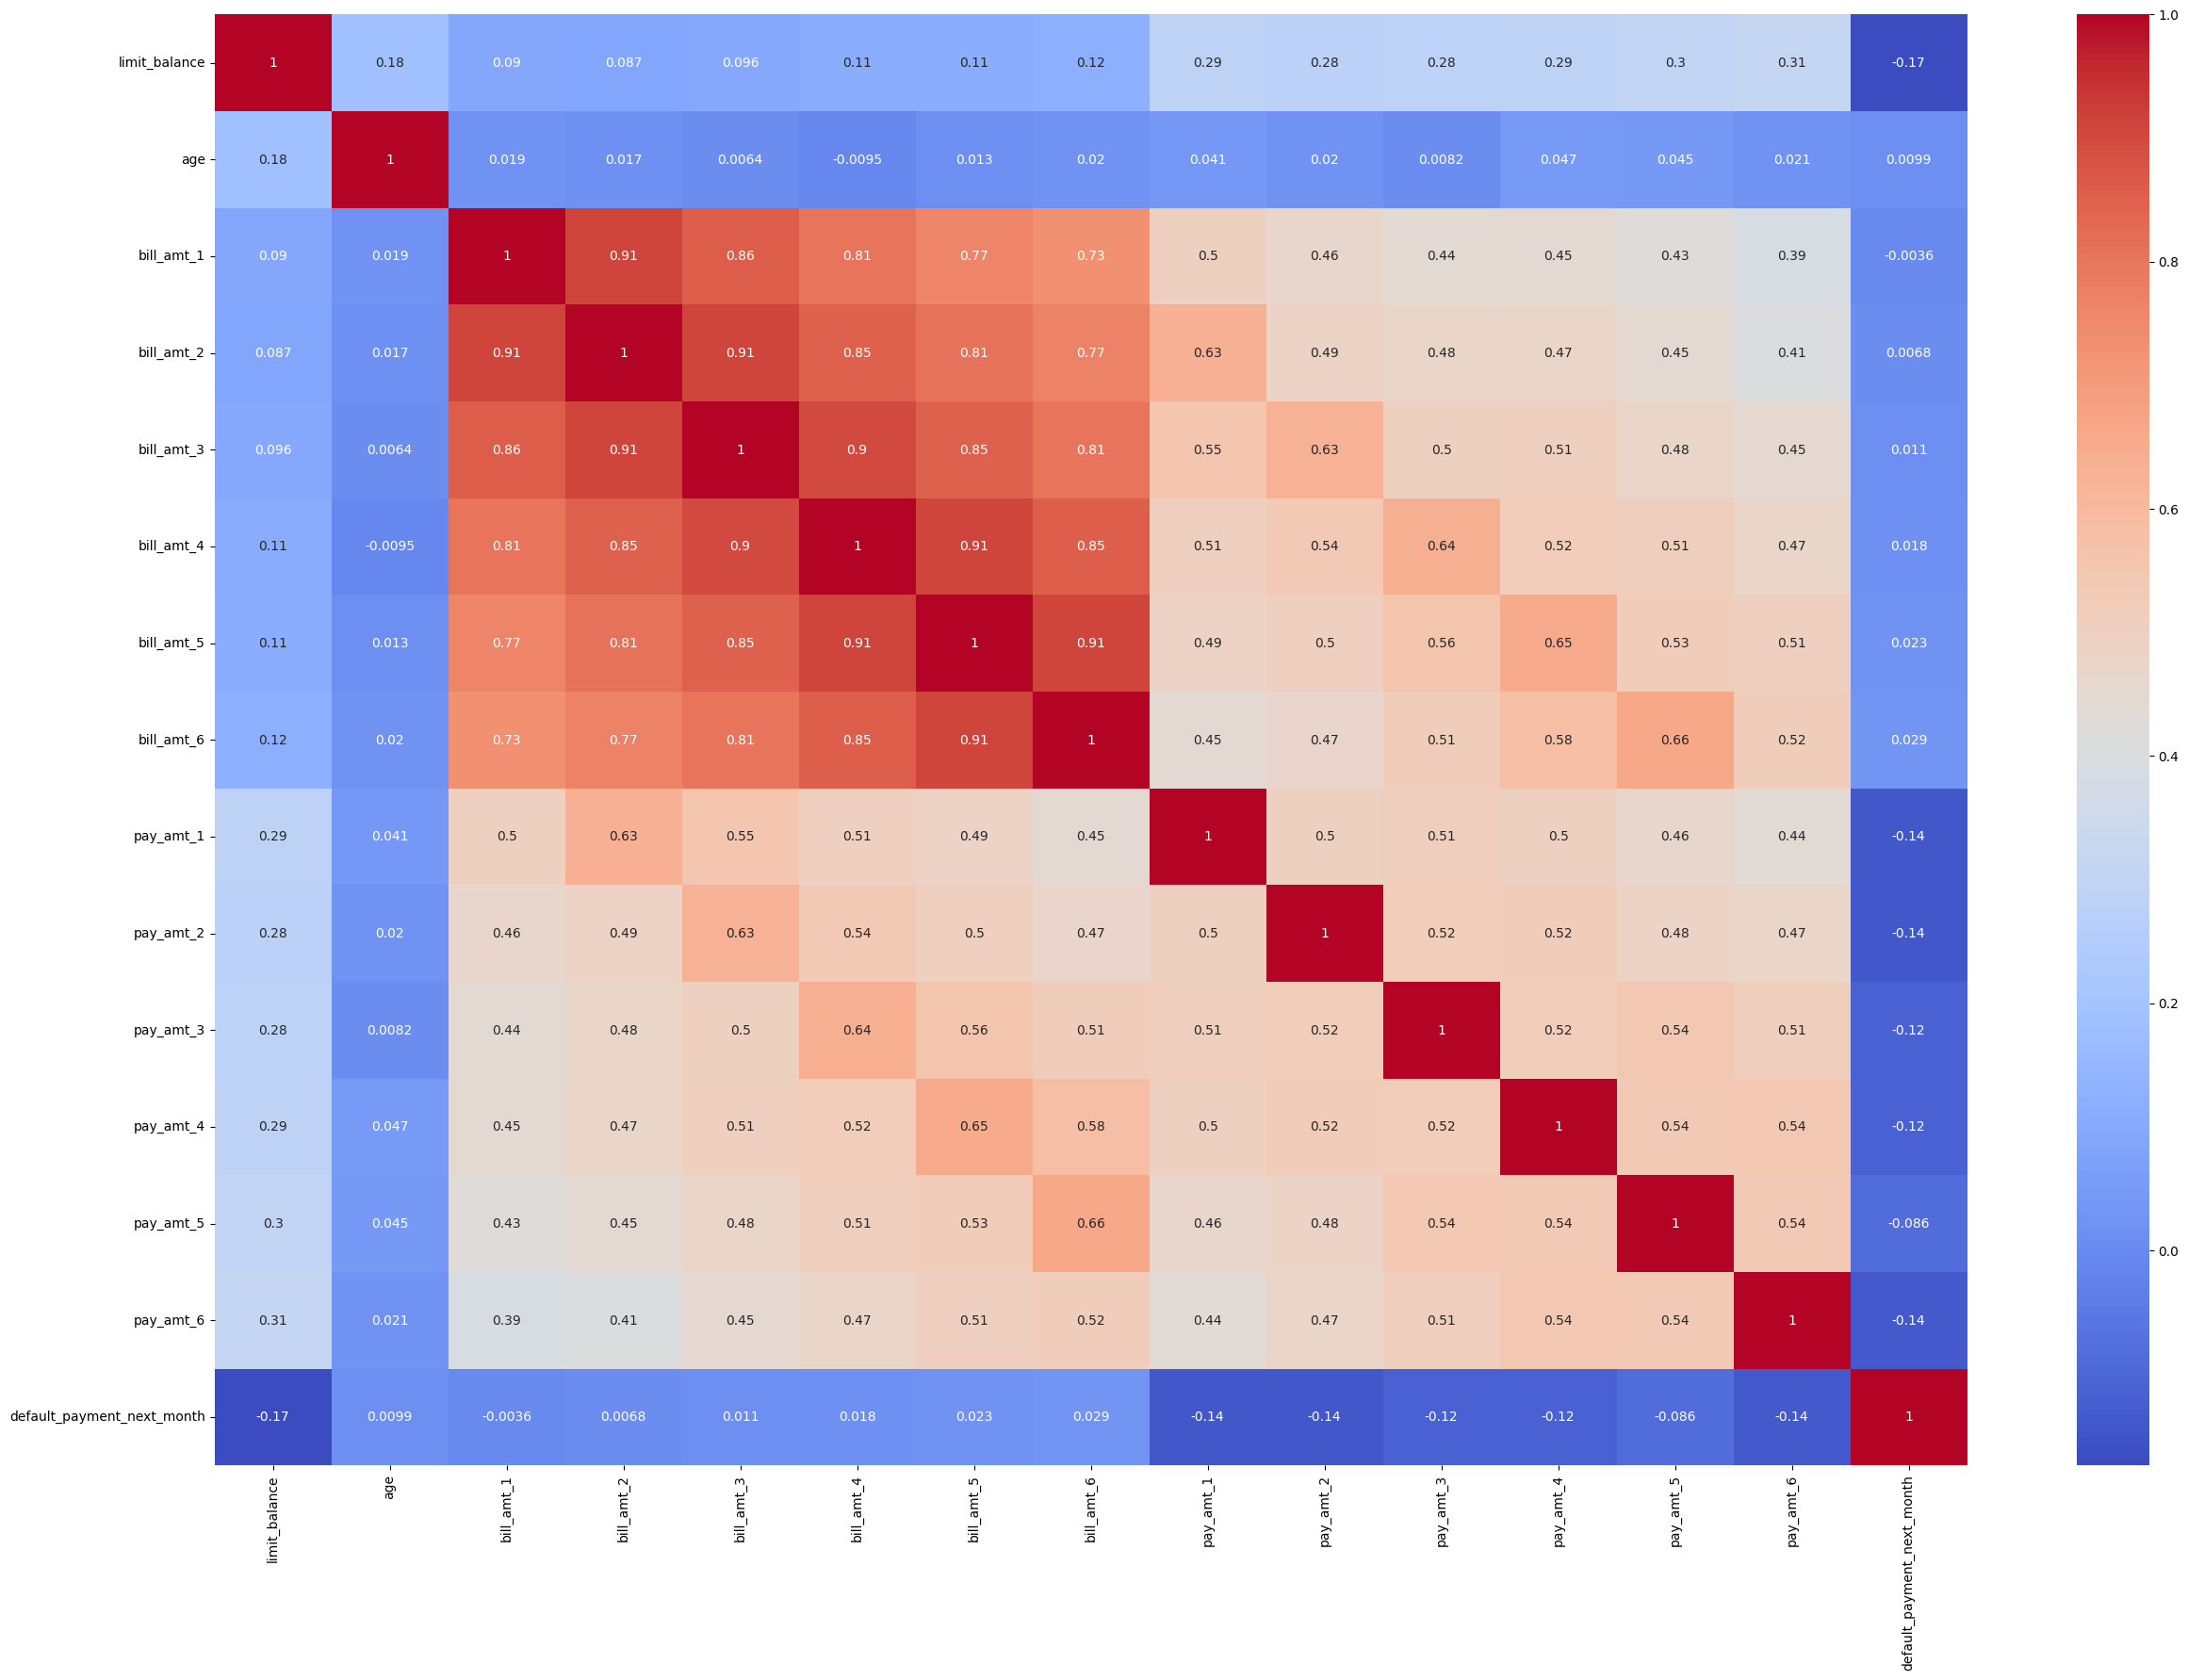

In [160]:
corr = df[col].corr(method='spearman') # Menggunakan spearman karena terdapat outlier
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

**Insight :** Korelasi tertinggi dengan fitur target yaitu -0.17 dengan fitur limit_balance

# **Feature Engineering**

## Split Data

In [161]:
X = df.drop('default_payment_next_month', axis=1)  # Data X selain fitur target
y = df.default_payment_next_month # Fitur target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=22) # Membagi dataset menjadi 80:20
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2372, 23), (2372,), (593, 23), (593,))

## Feature Transformation

### Outlier Handling

In [162]:
# Metode Capping untuk Distribusi Skew
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=highly_skewed+moderately_skewed, # Fitur fitur kontinu
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [163]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


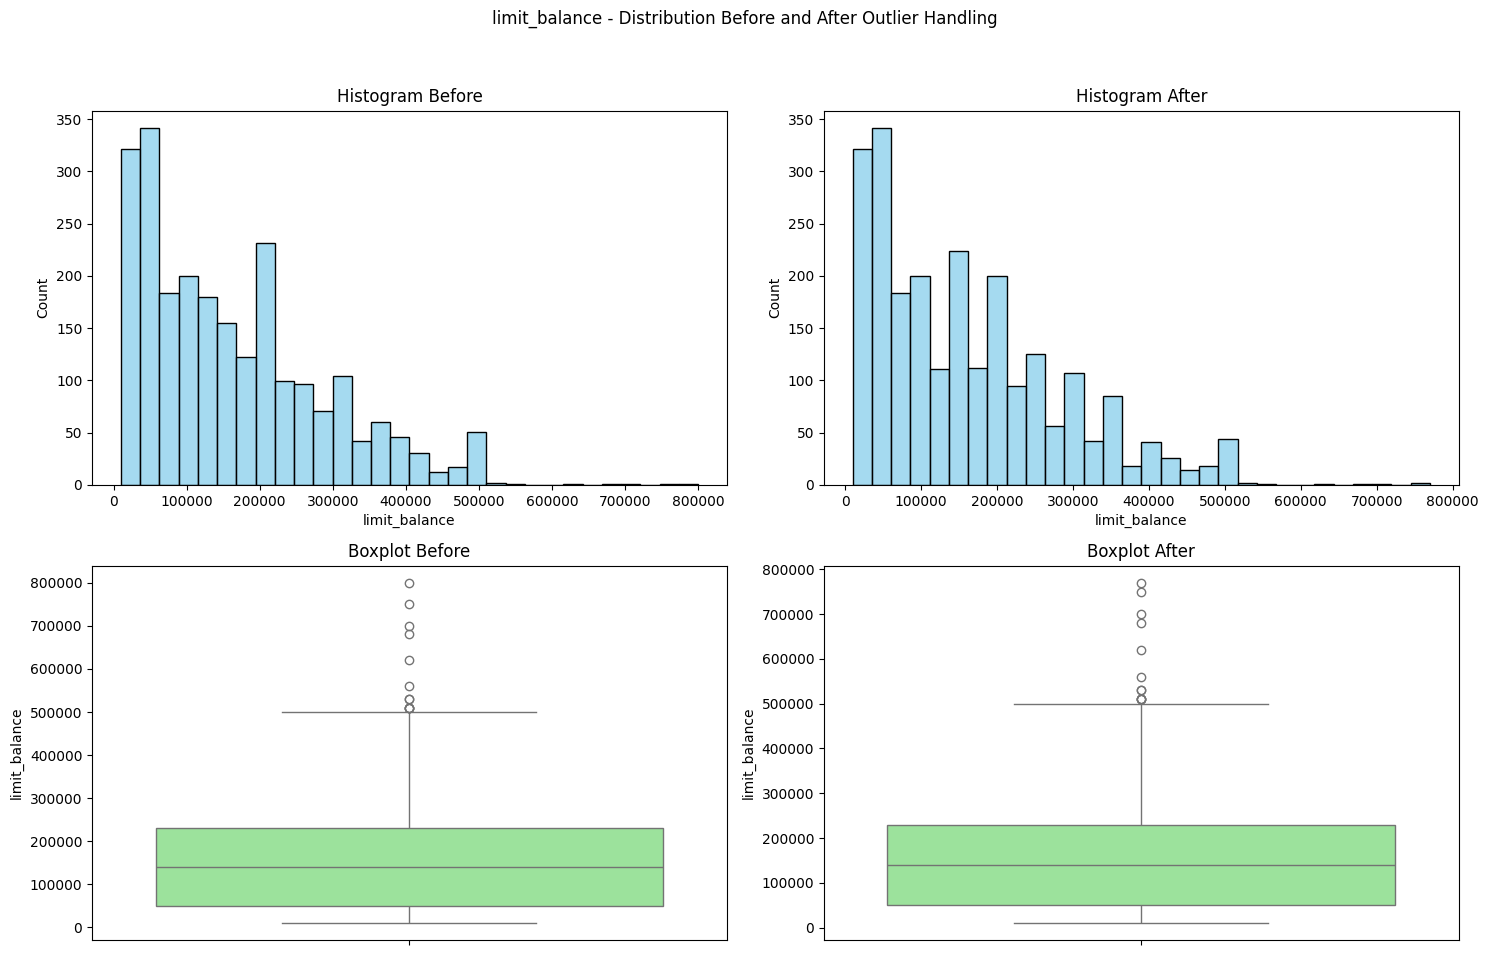

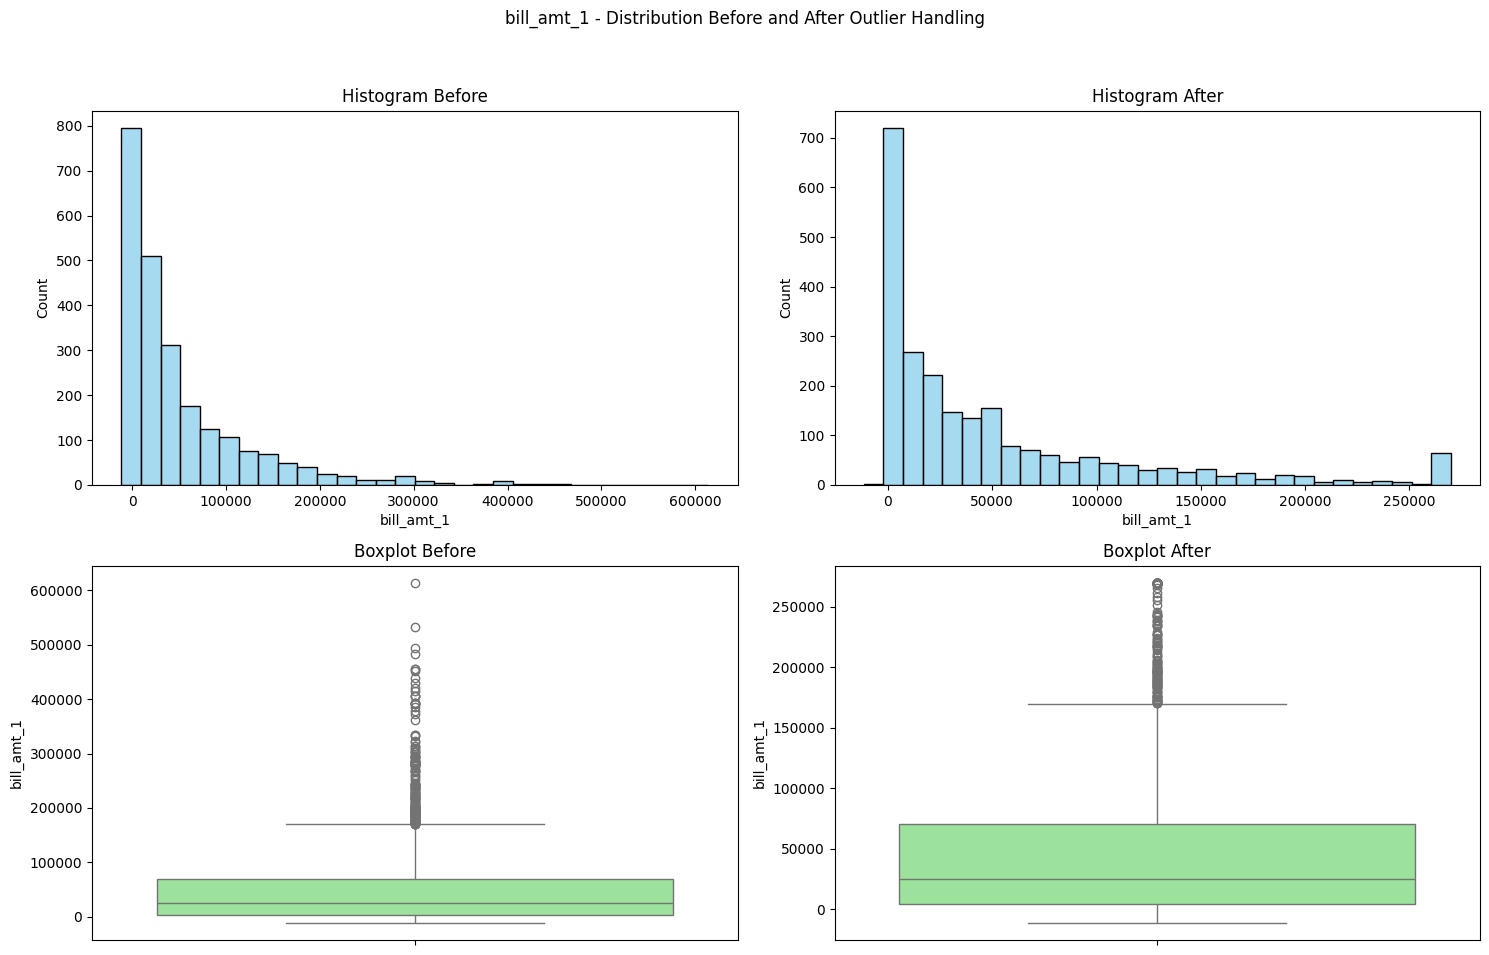

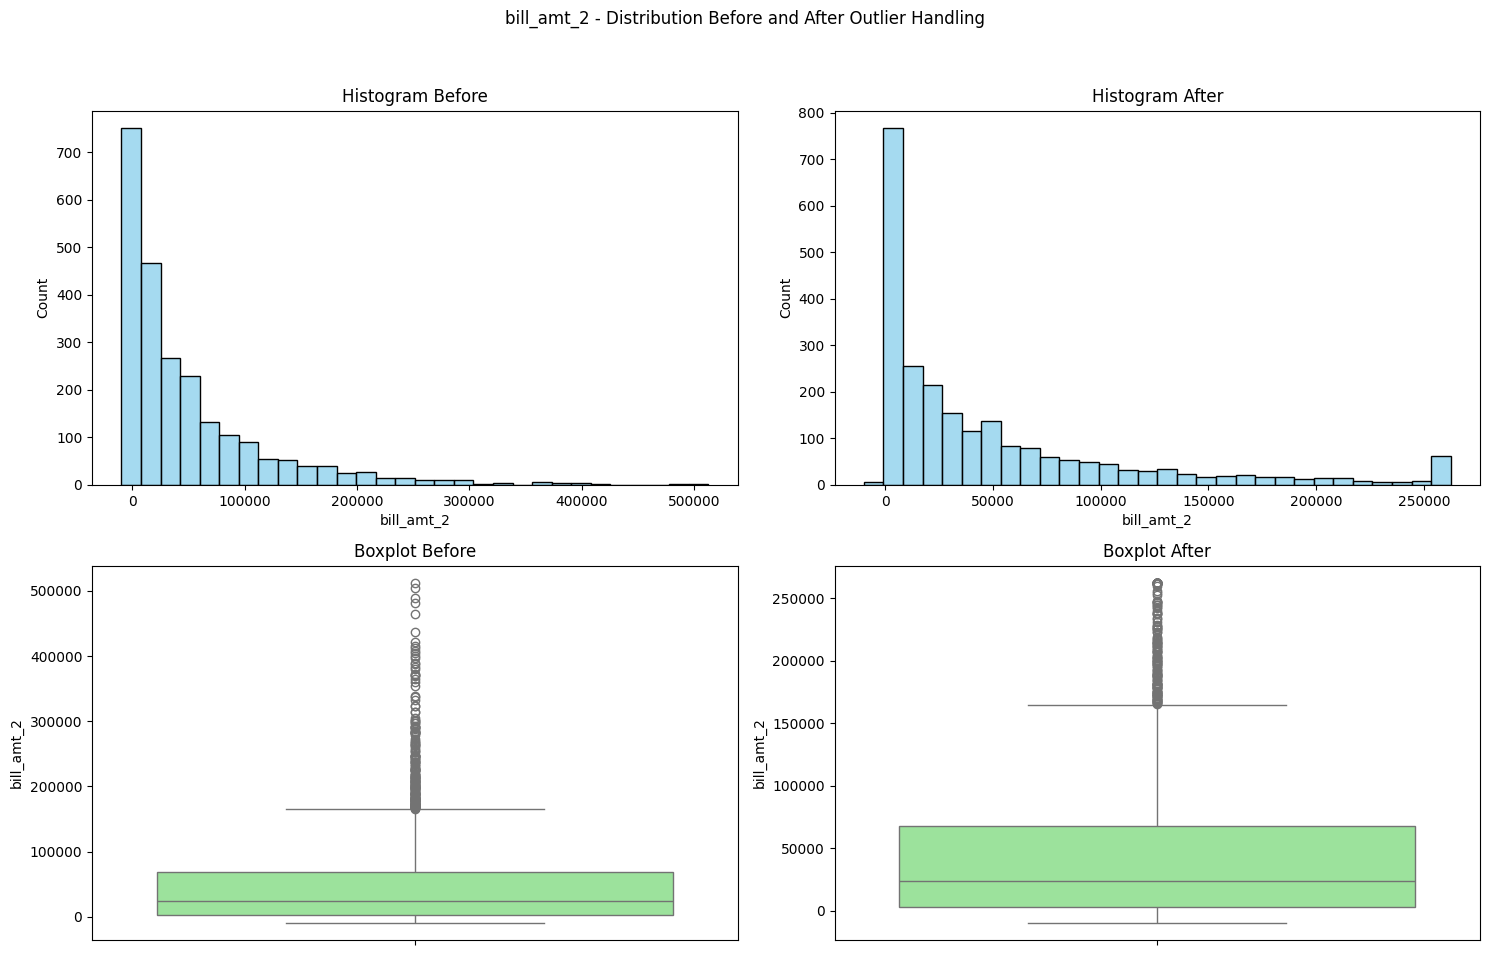

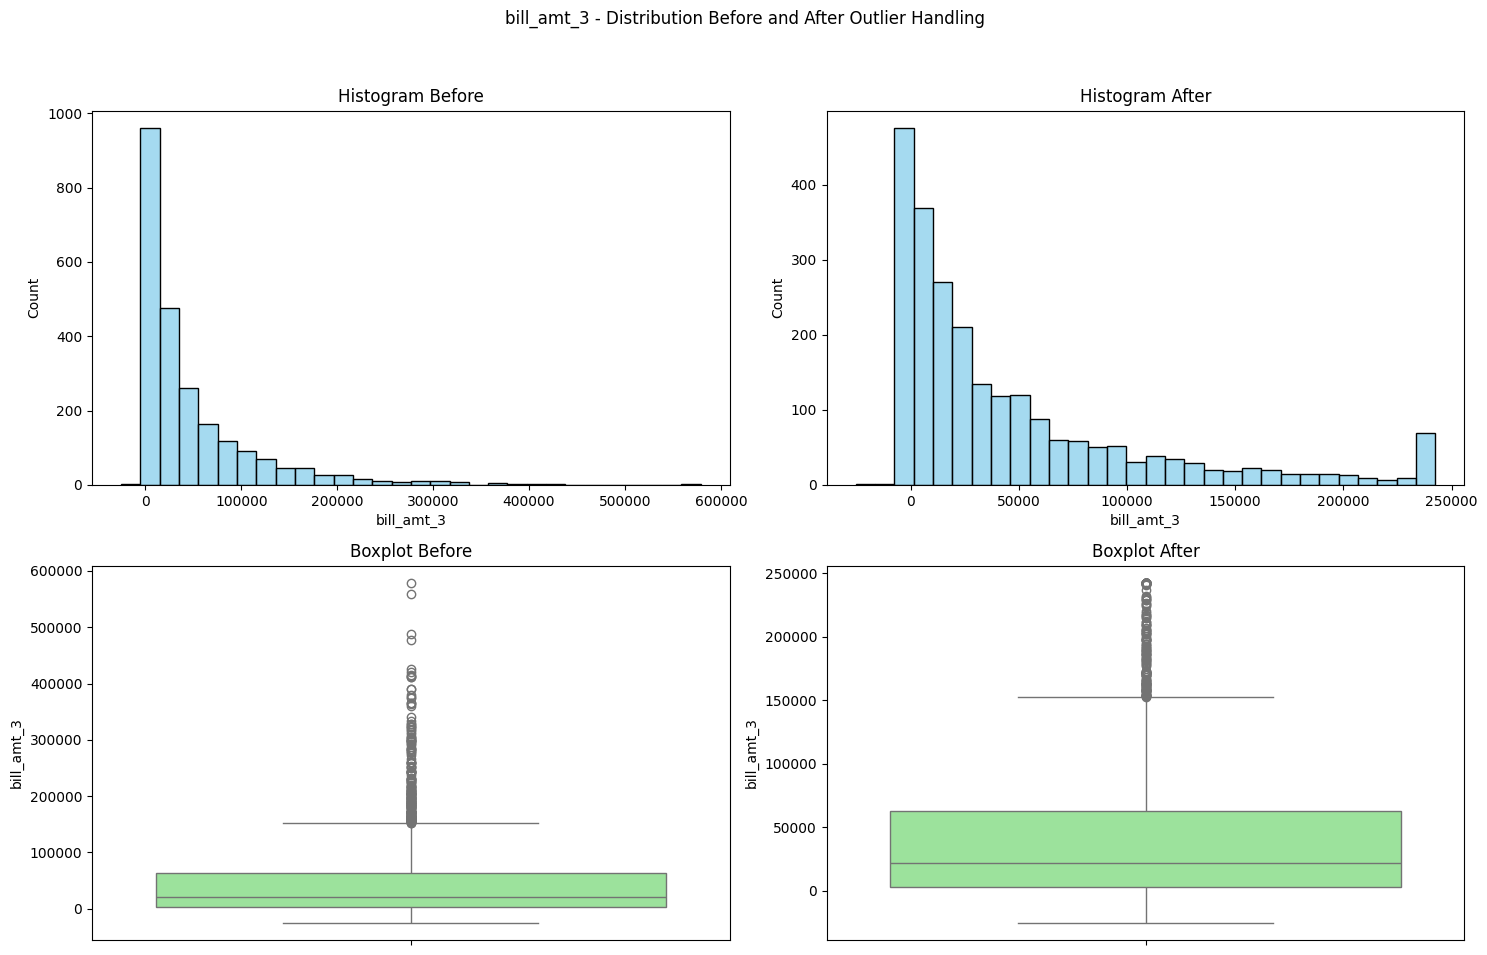

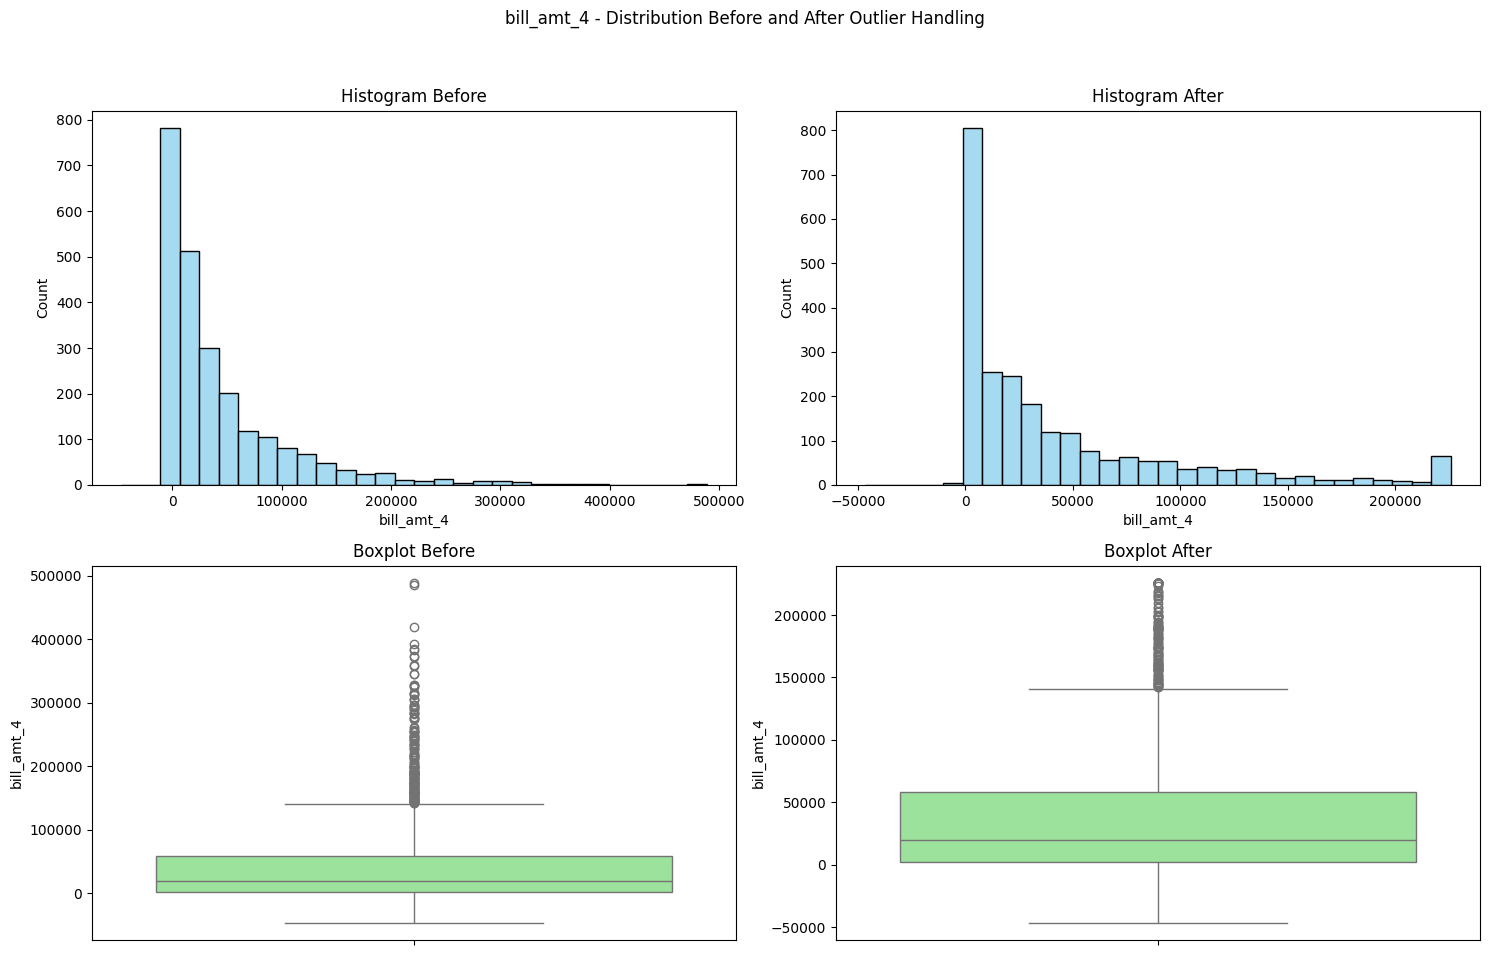

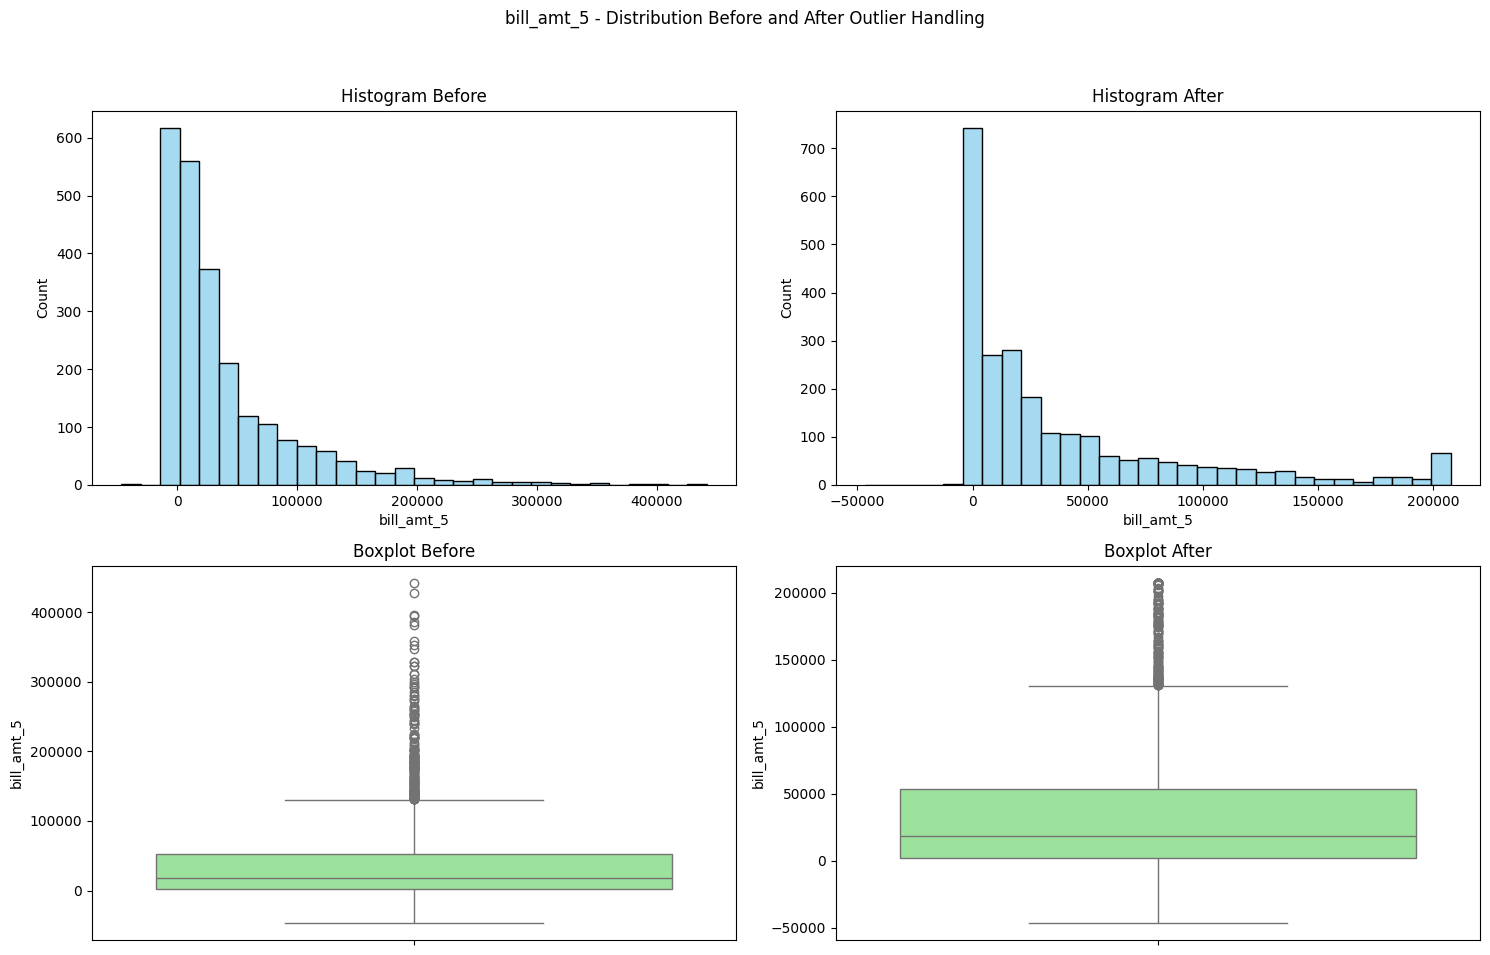

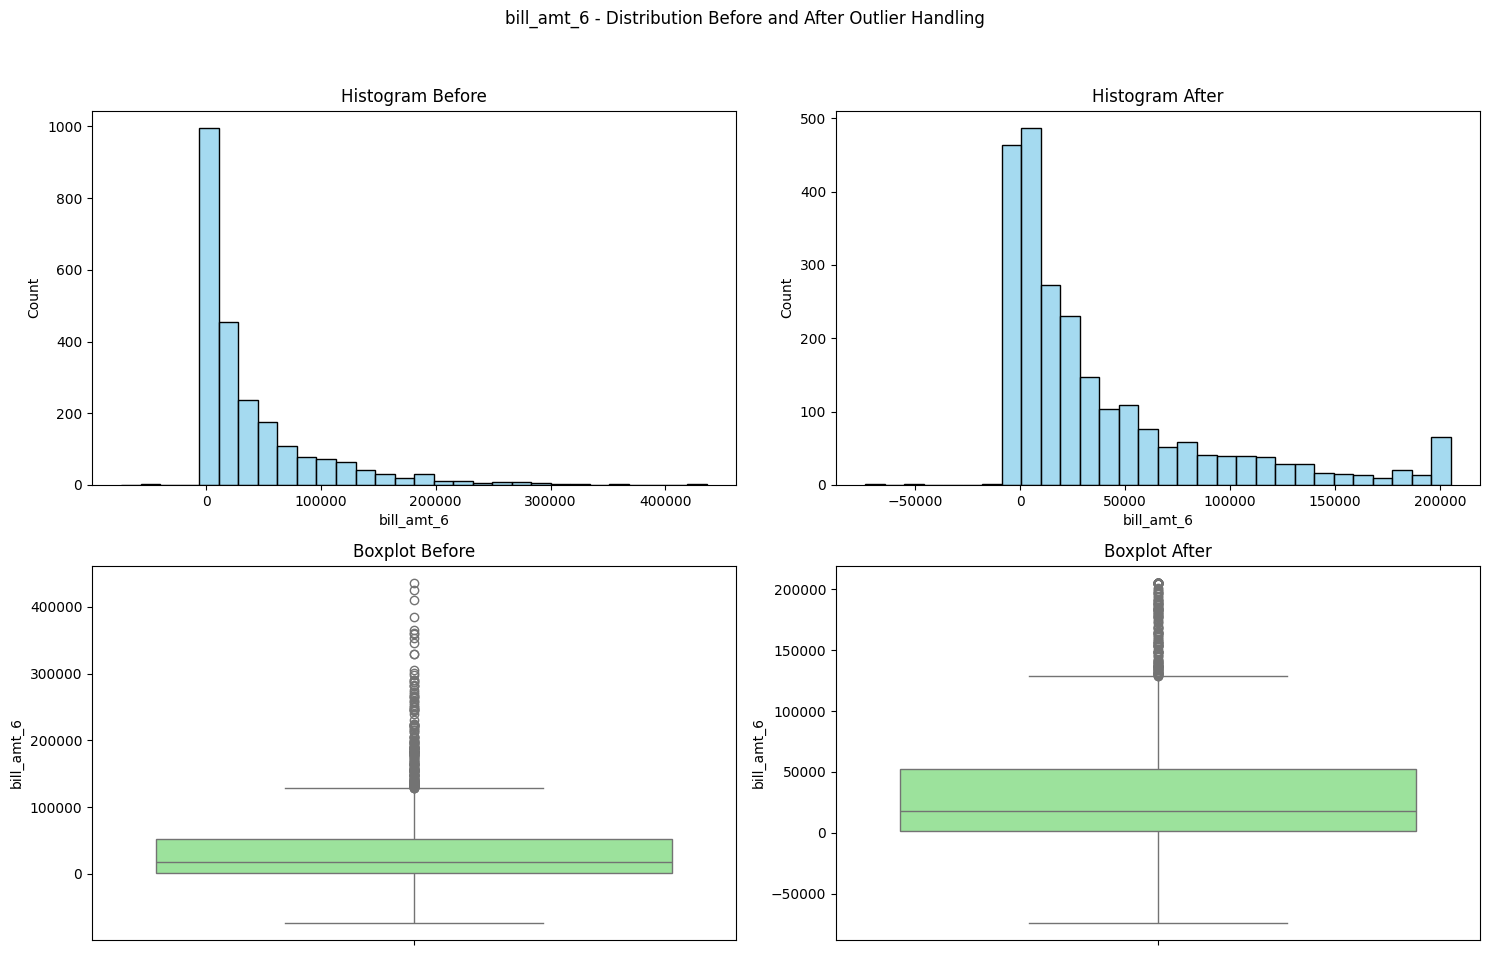

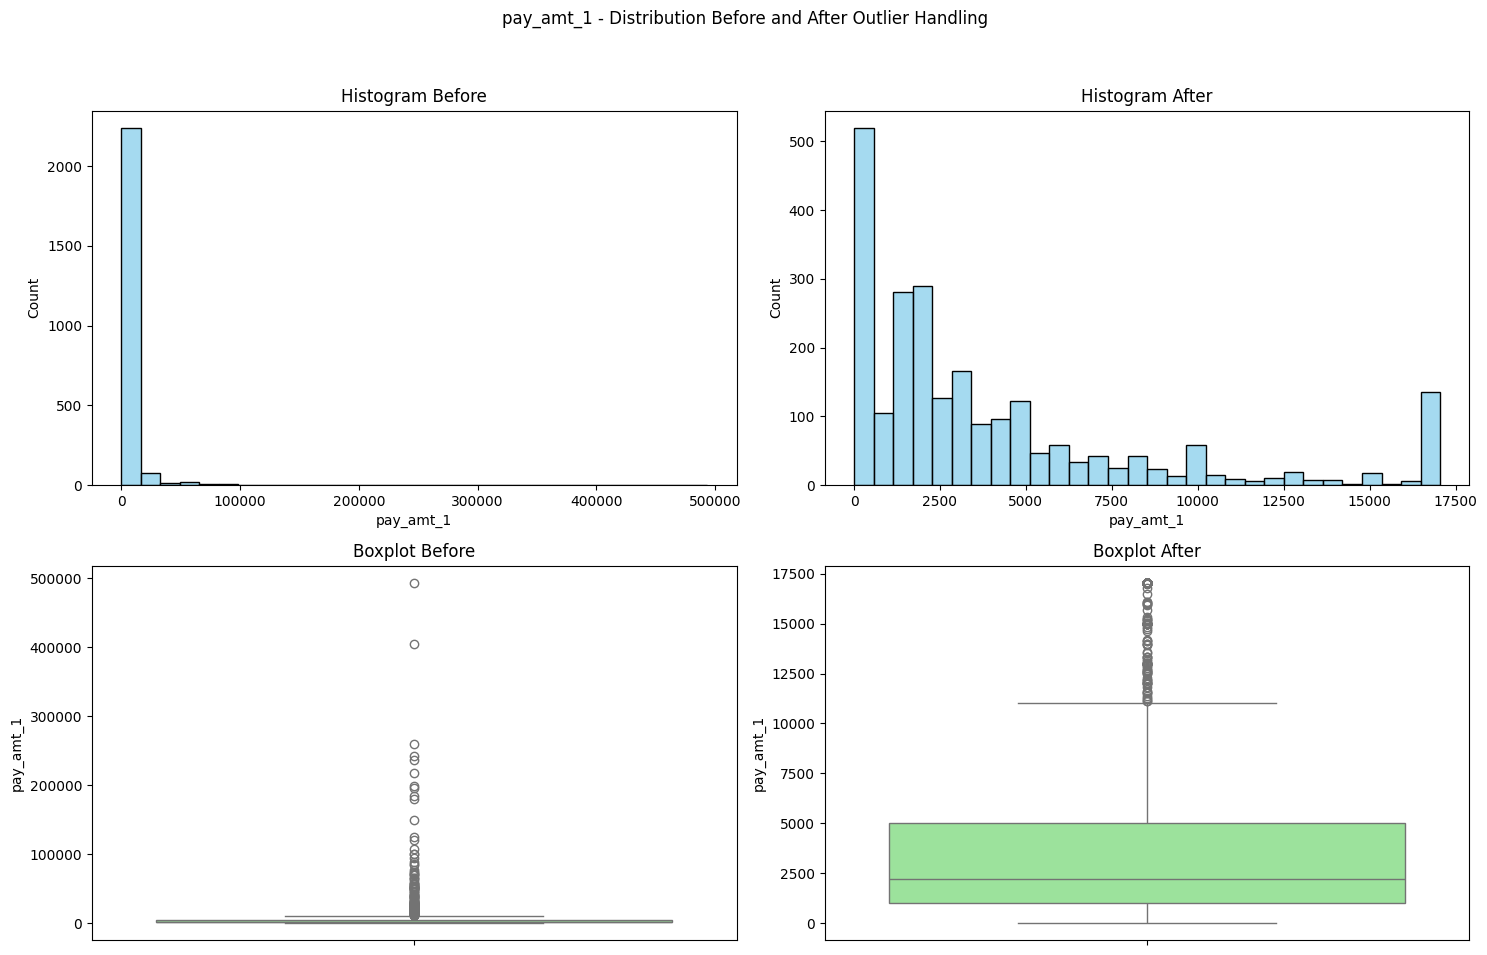

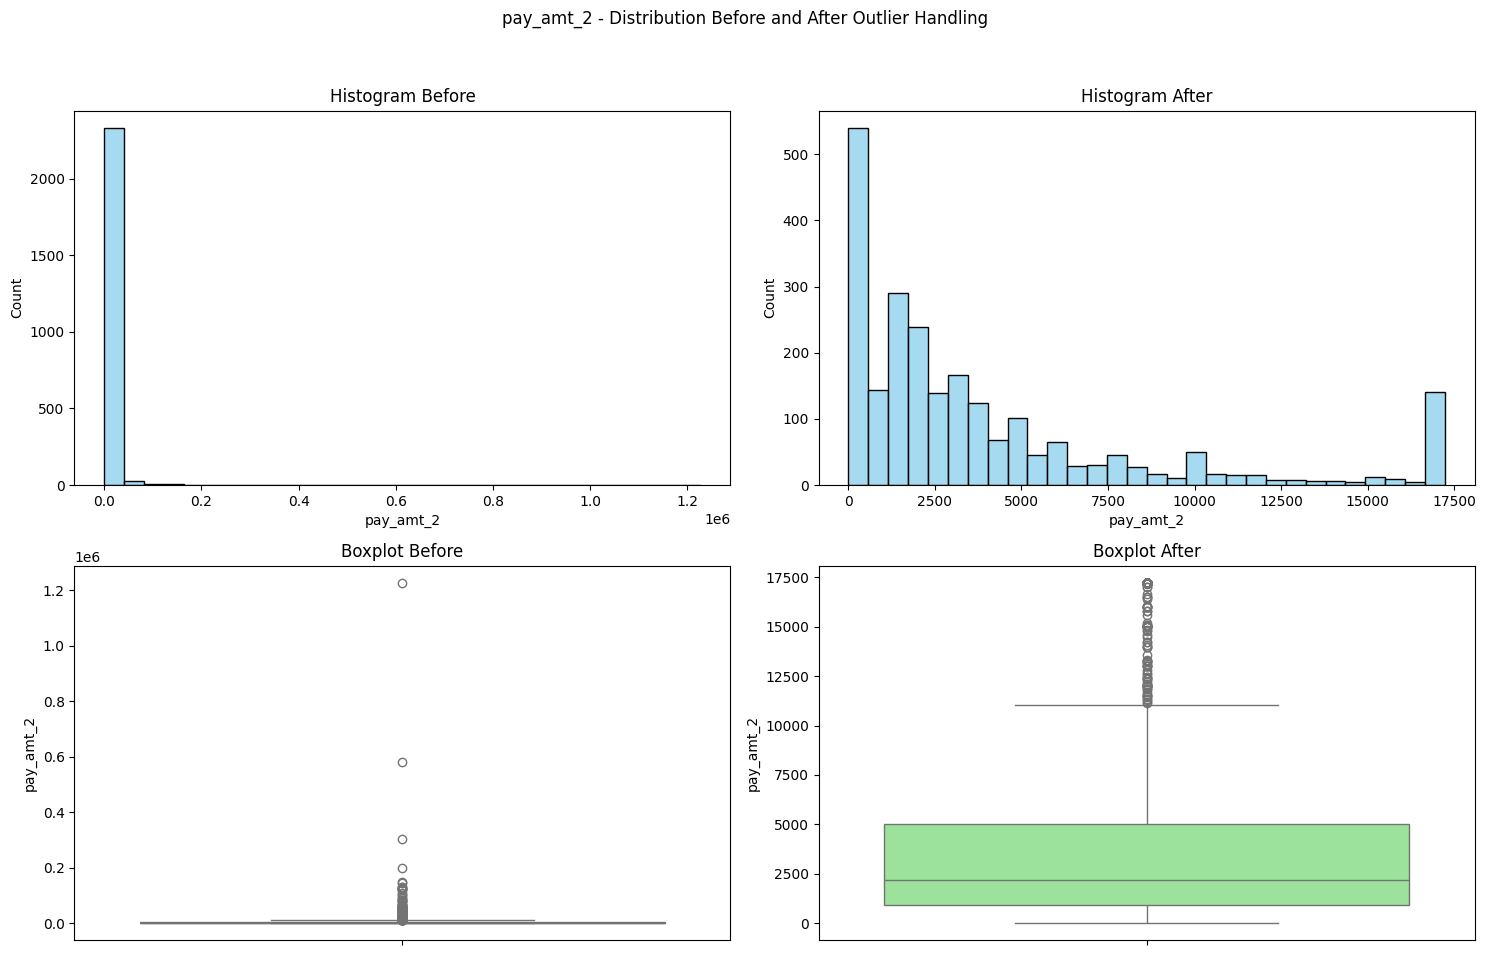

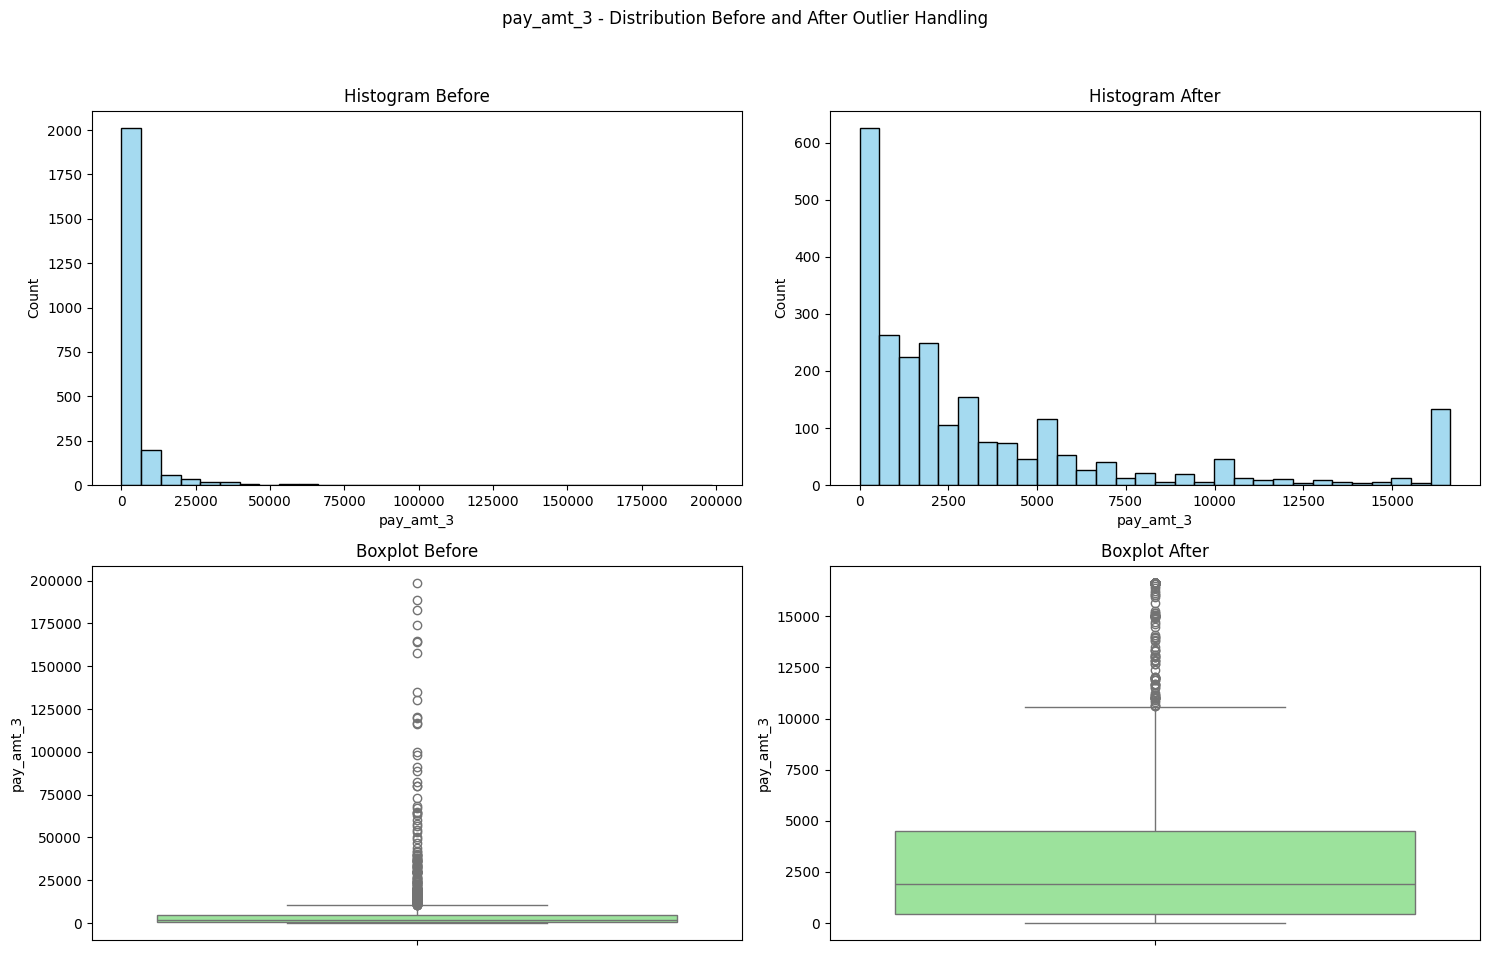

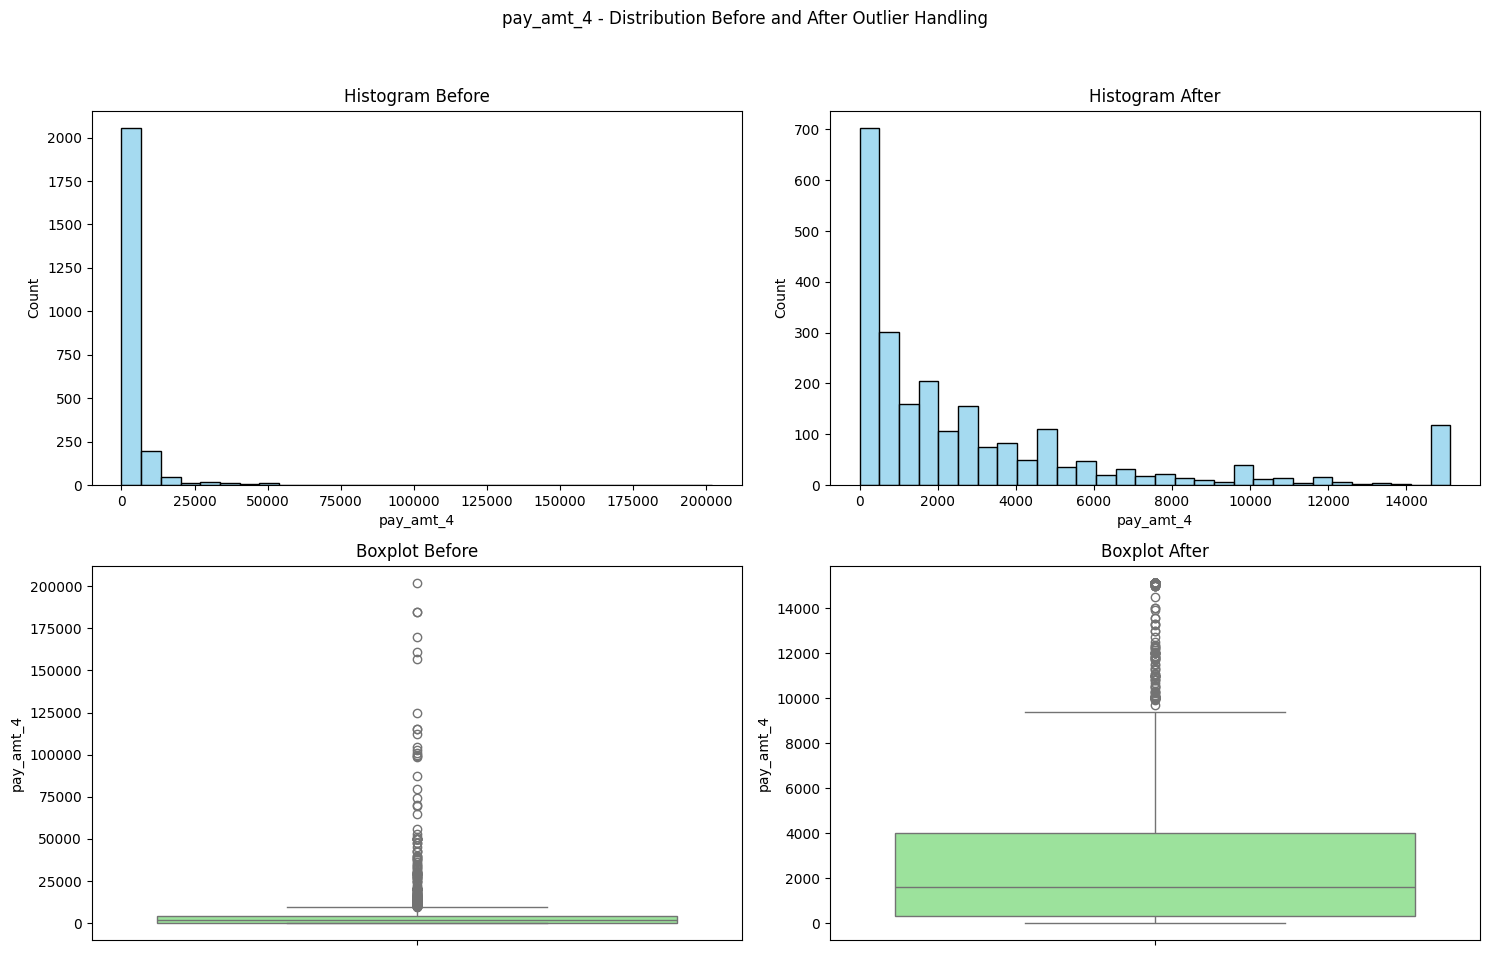

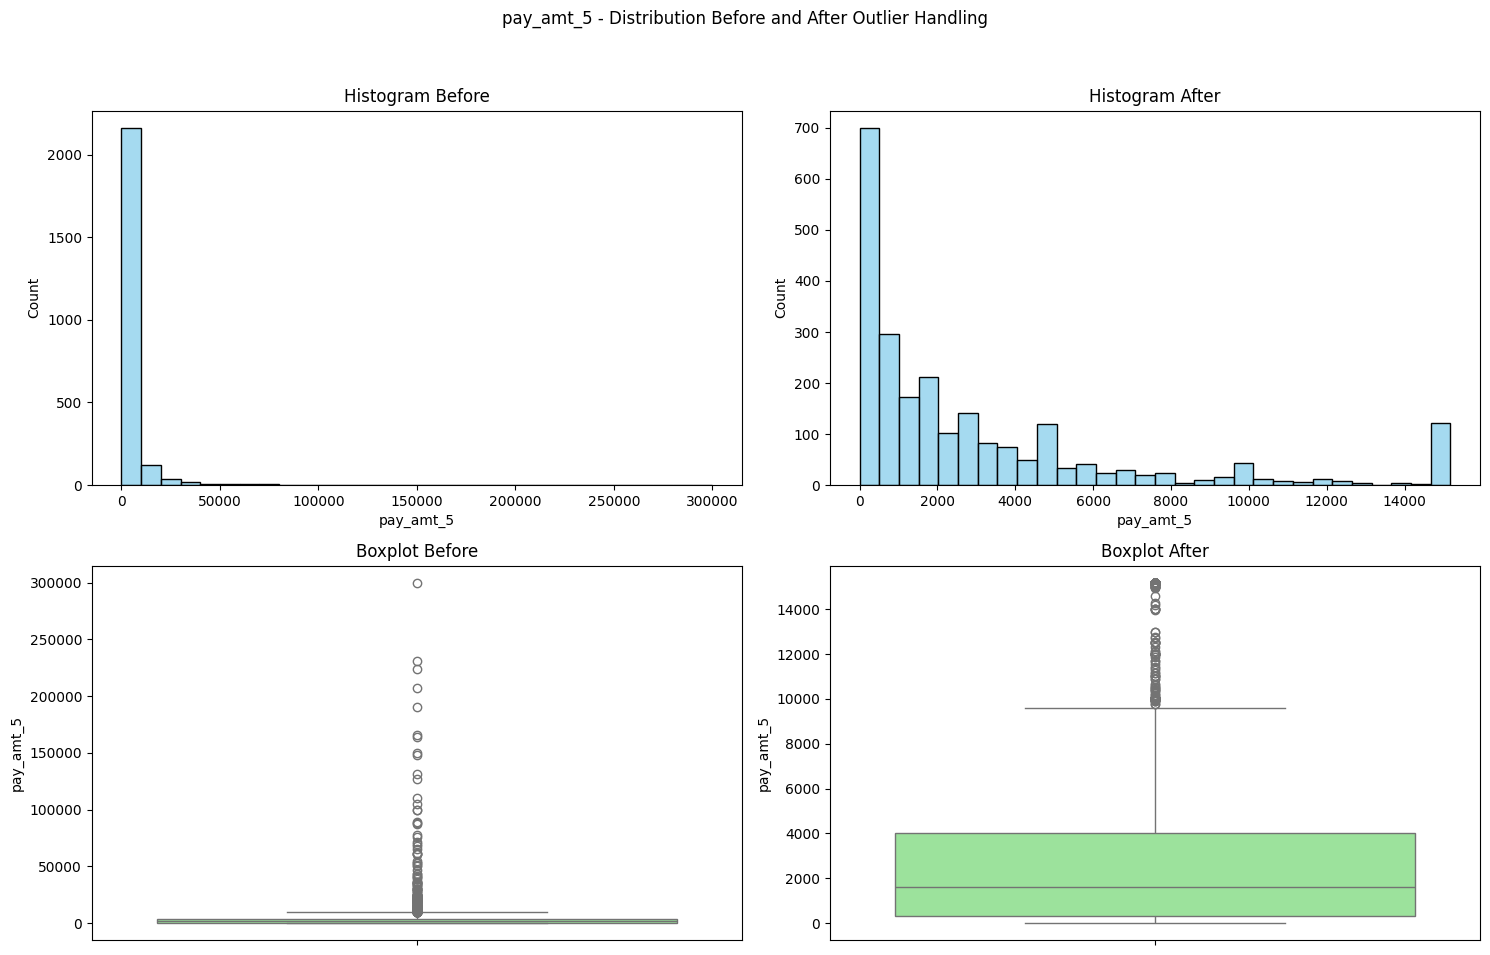

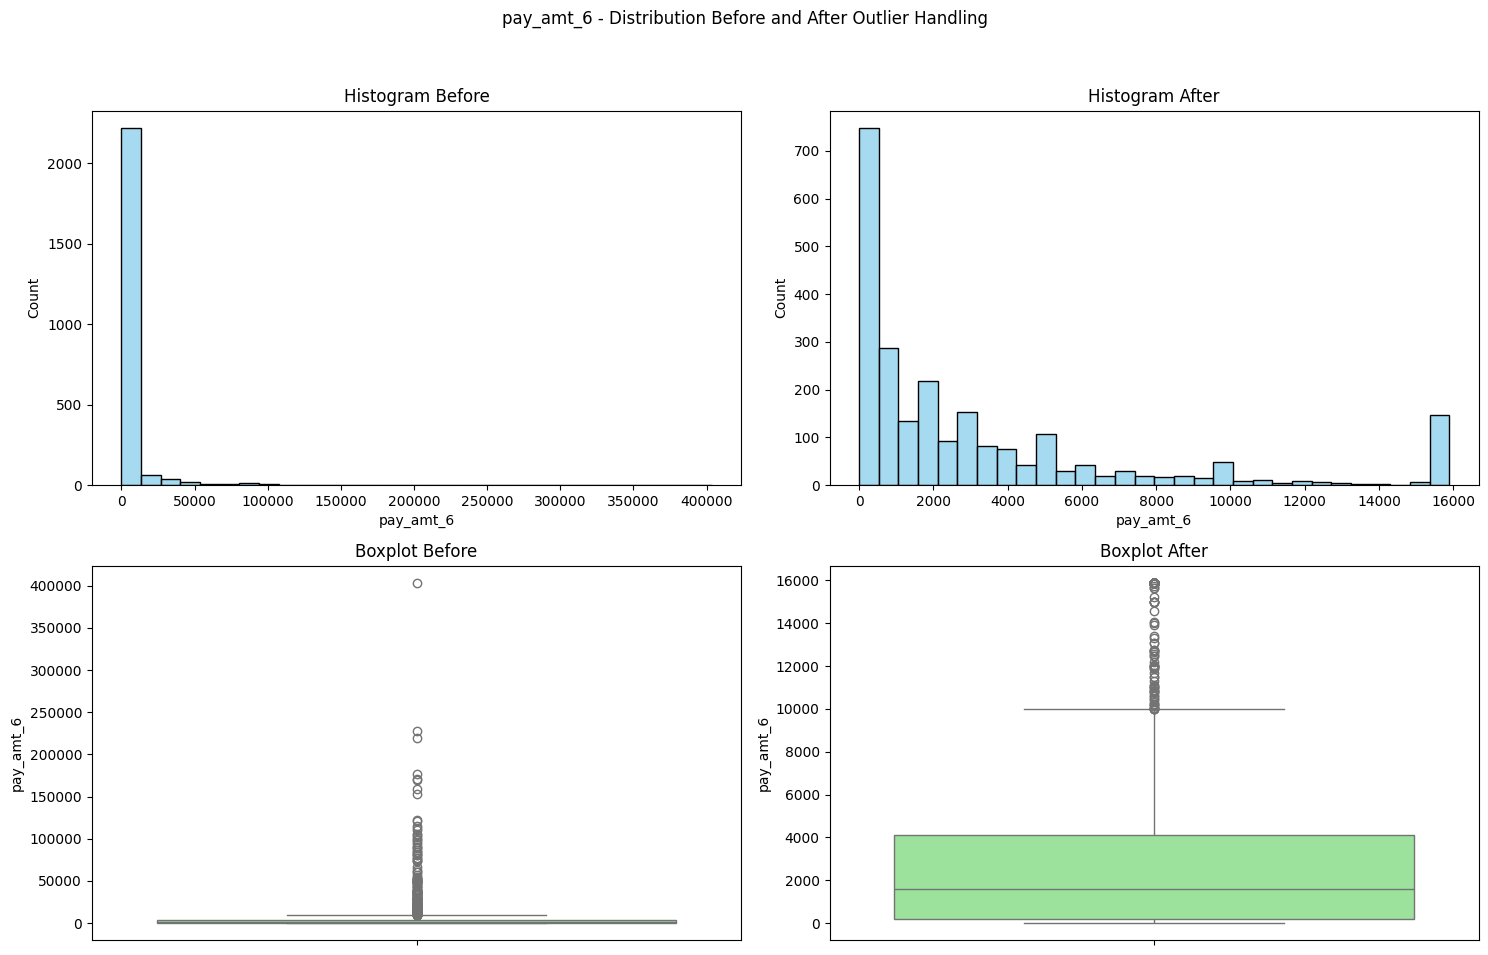

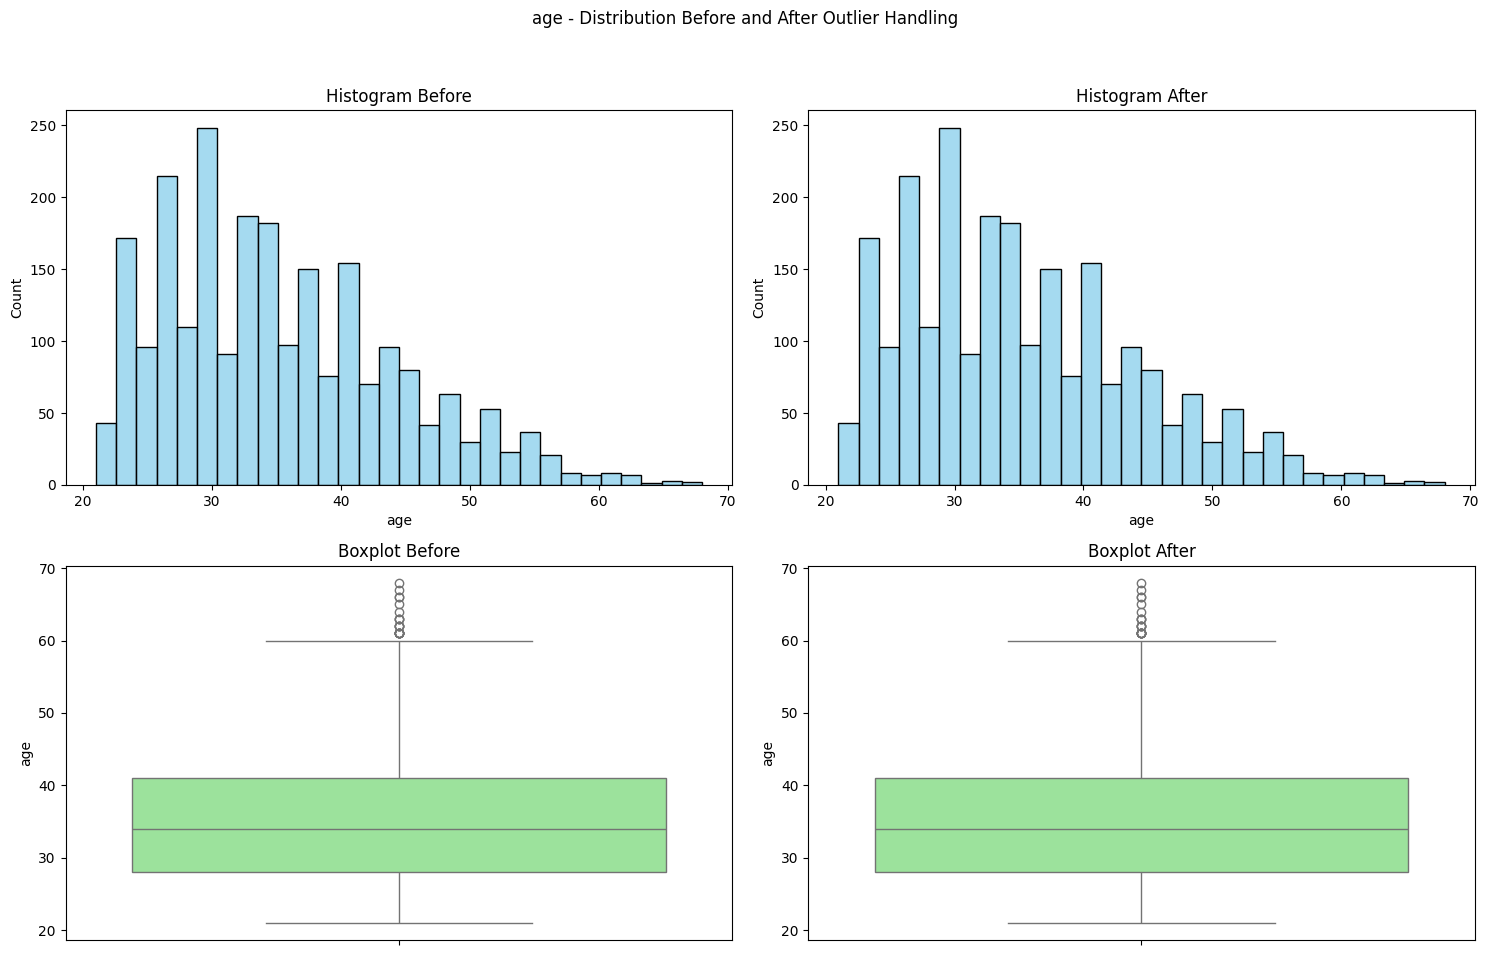

In [164]:
# Using the Function
num_cols = highly_skewed+moderately_skewed
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Insight :** Setelah dicapping masih terdapat nilai nilai diatas median atau kuartil, sehingga untuk scalling akan menggunakan `Robust Scalar`

## Feature Selection

- Untuk fitur fitur kontinu proses menghitung korelasi akan menggunakan pointbiserialr dikarenakan akan mengukur hubungan antara dua variabel, di mana satu variabel berjenis skala interval atau rasio (variabel kontinu) dan satu variabel berjenis biner (variabel kategorikal dengan dua kategori) yaitu fitur target
- Untuk fitur fitur kategorikal akan menggunakan Chi-Squared Test

### Kontinu

In [165]:
p_values = []
interpretation = []
cols = []
corr = []

col_kontinu = highly_skewed+moderately_skewed
# Menggunakan pointbiserialr untuk menghitung korelasi
for col in col_kontinu:
    corr_coef, p_value = pointbiserialr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Significant Correlation')
    else:
        interpretation.append('No Significant Correlation')

# Create DataFrame with all numeric values
correlation_df = pd.DataFrame({
    'Column Name': cols,
    'Correlation Coefficient': corr,
    'P-value': p_values
})

# Add 'Interpretation' column with interpretation values
correlation_df['Interpretation'] = interpretation

correlation_df

,Column Name,Correlation Coefficient,P-value,Interpretation
0,limit_balance,-0.161792,2.228154e-15,Significant Correlation
1,bill_amt_1,-0.014694,4.744162e-01,No Significant Correlation
2,bill_amt_2,-0.006076,7.674080e-01,No Significant Correlation
3,bill_amt_3,-0.001481,9.425252e-01,No Significant Correlation
4,bill_amt_4,-0.010543,6.077879e-01,No Significant Correlation
5,bill_amt_5,-0.000329,9.872275e-01,No Significant Correlation
6,bill_amt_6,-0.000344,9.866238e-01,No Significant Correlation
7,pay_amt_1,-0.129953,2.115076e-10,Significant Correlation
8,pay_amt_2,-0.139762,8.096537e-12,Significant Correlation
9,pay_amt_3,-0.117599,9.226880e-09,Significant Correlation


In [166]:
significant_correlation_columns_kontinu = correlation_df[correlation_df['Interpretation'] == 'Significant Correlation']['Column Name'].tolist()

print(significant_correlation_columns_kontinu)

['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


### Kategorikal

In [167]:
p_values = []
interpretation = []
cols = []

col_kat = col_cat
col_kat.remove('default_payment_next_month')
# Menggunakan pointbiserialr untuk menghitung korelasi
for col in col_kat:
    corr_coef, p_value = pointbiserialr(X_train_capped[col], y_train)
    contingency_table = pd.crosstab(X_train_capped[col],y_train)
    res = stats.chi2_contingency(contingency_table)

    p_values.append(res.pvalue)
    cols.append(col)

    if p_value < 0.05:
        interpretation.append('Significant Correlation')
    else:
        interpretation.append('No Significant Correlation')

# Create DataFrame with all numeric values
correlation_df = pd.DataFrame({
    'Column Name': cols,
    'P-value': p_values
})

# Add 'Interpretation' column with interpretation values
correlation_df['Interpretation'] = interpretation

correlation_df

,Column Name,P-value,Interpretation
0,sex,7.554721e-01,No Significant Correlation
1,education_level,4.372192e-04,Significant Correlation
2,marital_status,1.790973e-01,No Significant Correlation
3,pay_0,1.700832e-102,Significant Correlation
4,pay_2,7.440457e-55,Significant Correlation
5,pay_3,1.971273e-47,Significant Correlation
6,pay_4,8.599575e-48,Significant Correlation
7,pay_5,3.080616e-45,Significant Correlation
8,pay_6,1.824833e-39,Significant Correlation


In [168]:
significant_correlation_columns_kat = correlation_df[correlation_df['Interpretation'] == 'Significant Correlation']['Column Name'].tolist()

print(significant_correlation_columns_kat)

['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


### Satukan fitur hasil tes korelasi

In [169]:
fitur_selected_column = significant_correlation_columns_kat+significant_correlation_columns_kontinu

In [170]:
#Assign variables again based on the relevant
X_train_selected = X_train_capped[fitur_selected_column]
X_test_selected = X_test_capped[fitur_selected_column]

In [171]:
X_train_selected.head()

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2091,3,0,0,0,0,-1,-1,150000,8000.0,2000.0,1000.0,759,0.0,0.0
1880,2,2,2,2,2,2,2,60000,3200.0,2400.0,12.0,3200,1619.0,0.0
125,1,0,0,0,0,0,0,280000,8155.0,10048.0,6011.0,6010,6514.0,10011.0
994,2,0,0,0,0,0,-1,120000,1400.0,1000.0,0.0,1000,1087.0,801.0
732,2,0,0,0,0,0,0,80000,3500.0,3820.0,3220.0,4010,6700.0,7.0


# **Model Definition**

1. **Logistic Regression**:
   - Definisi: Logistic Regression sering kali digunakan untuk masalah klasifikasi biner dan merupakan pilihan yang baik ketika ingin memahami kontribusi variabel dalam membuat prediksi. Ini juga memiliki interpretasi yang mudah.
   - Hyperparameter yang dipilih:
     - `C`: Parameter regulasi yang mengontrol penalti untuk kompleksitas model. Dipilih nilai [0.1, 1, 10] untuk mencakup variasi kompleksitas.
     - `penalty`: Jenis penalti yang digunakan yaitu 'l1' dan 'l2' untuk variasi penalti.
     - `solver`: Algoritma yang digunakan dalam optimasi dengan 'liblinear' dan 'saga' yang dipilih.
   - Metrik evaluasi: ROC AUC. Metrik ini dapat memberikan pemahaman yang baik tentang seberapa baik model dapat membedakan antara kelas-kelas, terutama di dalam kasus yang tidak seimbang.

2. **k-Nearest Neighbors (kNN)**:
   - Definisi: kNN adalah metode sederhana dan intuitif yang dapat digunakan untuk klasifikasi. Ini bekerja dengan mencari titik-titik data terdekat (dalam ruang fitur) untuk memutuskan label kelas.
   - Hyperparameter yang dipilih:
     - `n_neighbors`: Jumlah tetangga yang dipertimbangkan dalam klasifikasi. Dipilih nilai [3, 5, 7].
     - `weights`: Skema penimbangan yang digunakan dalam perhitungan tetangga terdekat. 'uniform' dan 'distance' dipilih untuk variasi.
     - `algorithm`: Algoritma yang digunakan untuk menghitung tetangga terdekat. Dipilih berbagai algoritma yang tersedia.
   - Metrik evaluasi: ROC AUC. Metrik ini dapat memberikan pemahaman yang baik tentang seberapa baik model dapat membedakan antara kelas-kelas, terutama di dalam kasus yang tidak seimbang.

3. **Support Vector Machine (SVM)**:
   - Definisi: SVM cocok untuk klasifikasi data dengan ruang fitur yang kompleks dan memiliki potensi untuk generalisasi yang baik.
   - Hyperparameter yang dipilih:
     - `C`: Parameter penalti kesalahan klasifikasi.
     - `kernel`: Fungsi kernel yang digunakan dalam transformasi ruang fitur. Berbagai kernel dipilih untuk variasi.
     - `gamma`: Koefisien kernel untuk 'rbf', 'poly', dan 'sigmoid'.
   - Metrik evaluasi: ROC AUC. Metrik ini dapat memberikan pemahaman yang baik tentang seberapa baik model dapat membedakan antara kelas-kelas, terutama di dalam kasus yang tidak seimbang.

# **Model Training**

In [172]:
# Using columntransformer to create preprocessor pipeline
preprocessor = ColumnTransformer([('numeric', RobustScaler(), significant_correlation_columns_kontinu)], remainder='passthrough')

## **Creating Pipelines For The Model With Default Hyperparameters**

In [173]:
# Making a pipeline for logistic regression

pipe_logreg = make_pipeline(preprocessor, LogisticRegression(random_state=42))
pipe_logreg.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_logreg.steps)

# Making a pipeline for KNN

pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_knn.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_knn.steps)

# Making a pipeline for SVM

pipe_svm = make_pipeline(preprocessor, SVC(random_state=42))
pipe_svm.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_svm.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', RobustScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])), ('logisticregression', LogisticRegression(random_state=42))]
Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', RobustScaler(),
                                 ['limit_balance', 'pay_amt_1', 'pay_amt_2',
                                  'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                  'pay_amt_6'])])), ('kneighborsclassifier', KNeighborsClassifier())]
Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', RobustScaler(),
                                 ['limit_balance', 'p

In [174]:
# Define models
models = {
    'Logistic Regression': pipe_logreg,
    'kNN': pipe_knn,
    'SVM': pipe_svm
}

# Initialize DataFrame to store ROC AUC scores for training and testing
df_model_roc_auc = pd.DataFrame(columns=models.keys(), index=['Training ROC-AUC', 'Testing ROC-AUC'])

# Loop over models to calculate ROC AUC scores for both training and testing
for model_name, model in models.items():
    # Calculate ROC AUC score for training data
    y_train_pred_proba = model.predict(X_train_selected)
    training_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    
    # Calculate ROC AUC score for testing data
    y_test_pred_proba = model.predict(X_test_selected)
    testing_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    # Store ROC AUC scores in DataFrame
    df_model_roc_auc.loc['Training ROC-AUC', model_name] = training_roc_auc
    df_model_roc_auc.loc['Testing ROC-AUC', model_name] = testing_roc_auc

df_model_roc_auc

,Logistic Regression,kNN,SVM
Training ROC-AUC,0.62492,0.714493,0.682008
Testing ROC-AUC,0.63995,0.67289,0.654625


- Nilai ROC-AUC pada train terbesar ada pada algoritma kNN yaitu 0.71 dan memiliki nilai 0.67 pada test yang berarti memiliki selisih 0,4. mengindikasikan adanya overfitting. 
- Untuk SVM memiliki selisih 0.3
- Untuk Logistic Regression memiliki selisih 0.2

**Kesimpulan :** Model SVM terbilang lebih baik dikarenakan memiliki nilai ROC-AUC lebih tinggi dari LogReg dan selisih tidak terlalu besar seperti kNN

## **Model Optimization**

### RandomSearchCV

In [175]:
# Daftar model dan parameter pencarian hipermeter
models = {
    'Logistic Regression': pipe_logreg,
    'kNN': pipe_knn,
    'SVM': pipe_svm
}

random_search_params = {
    'Logistic Regression': {
        'logisticregression__C': uniform(0.1, 10),
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__solver': ['liblinear', 'saga']
    },
    'kNN': {
        'kneighborsclassifier__n_neighbors': [3,5,7],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'SVM': {
        'svc__C': uniform(0.1, 10),
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__gamma': [1, 0.1, 0.01, 0.001]
    }
}

# Dictionary untuk menyimpan hasil pencarian hipermeter
random_search_results = {}

# Melakukan pencarian hipermeter untuk setiap model
for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=random_search_params[model_name],
                                       n_iter=50,
                                       cv=5,
                                       random_state=46,
                                       n_jobs=-1,
                                       scoring='roc_auc').fit(X_train_selected, y_train)
    
    random_search_results[model_name] = random_search


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [176]:
best_pipe_random = []

# Menampilkan hasil pencarian hipermeter untuk setiap model
for model_name, random_search in random_search_results.items():
    print(f"Model: {model_name}")
    print("Best Parameters:", random_search.best_params_)
    best_pipe_random.append(random_search.best_estimator_)
    print()

Model: Logistic Regression
Best Parameters: {'logisticregression__C': 0.16246276335343693, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}

Model: kNN
Best Parameters: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__algorithm': 'brute'}

Model: SVM
Best Parameters: {'svc__C': 0.3322350511829474, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}



In [177]:
# Define the tuned model
models = {
    'Tuned Logistic Regression' : best_pipe_random[0],
    'Tuned kNN' : best_pipe_random[1],
    'Tuned SVM': best_pipe_random[2]
}

# Define the metrics
metrics = {
    'ROC-AUC': roc_auc_score
}

# Initialize DataFrame to store ROC-AUC scores for training and testing
model_tuning_random = pd.DataFrame(columns=models.keys(), index=['Training ROC-AUC', 'Testing ROC-AUC'])

# Loop over metrics and models to calculate ROC-AUC scores for both training and testing
for metric in metrics.keys():
    for model_name, model in models.items():
        # Calculate ROC-AUC score for training data
        y_train_pred = model.predict(X_train_selected)
        training_roc_auc = metrics[metric](y_train, y_train_pred)
        
        # Calculate ROC-AUC score for testing data
        y_test_pred = model.predict(X_test_selected)
        testing_roc_auc = metrics[metric](y_test, y_test_pred)
        
        # Store ROC-AUC scores in DataFrame
        model_tuning_random.loc['Training ROC-AUC', model_name] = training_roc_auc
        model_tuning_random.loc['Testing ROC-AUC', model_name] = testing_roc_auc

model_tuning_random

,Tuned Logistic Regression,Tuned kNN,Tuned SVM
Training ROC-AUC,0.617314,0.68738,0.619373
Testing ROC-AUC,0.629212,0.65356,0.636367


### GridSearchCV

In [178]:
from sklearn.model_selection import GridSearchCV

# Daftar model dan parameter pencarian hipermeter
models = {
    'Logistic Regression': pipe_logreg,
    'kNN': pipe_knn,
    'SVM': pipe_svm
}

grid_search_params = {
    'Logistic Regression': {
        'logisticregression__C': [0.1, 1, 10],
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__solver': ['liblinear', 'saga']
    },
    'kNN': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'SVM': {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__gamma': [1, 0.1, 0.01, 0.001]
    }
}

# Dictionary untuk menyimpan hasil pencarian hipermeter
grid_search_results = {}

# Melakukan pencarian hipermeter untuk setiap model
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=grid_search_params[model_name],
                               cv=5,
                               n_jobs=-1,
                               scoring='roc_auc').fit(X_train_selected, y_train)
    
    grid_search_results[model_name] = grid_search

In [179]:
best_pipe_grid = []

# Menampilkan hasil pencarian hipermeter untuk setiap model
for model_name, grid_search in grid_search_results.items():
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    best_pipe_grid.append(grid_search.best_estimator_)
    print()

Model: Logistic Regression
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}

Model: kNN
Best Parameters: {'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}

Model: SVM
Best Parameters: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}



In [180]:
# Define the tuned model
models = {
    'Tuned Logistic Regression' : best_pipe_grid[0],
    'Tuned kNN' : best_pipe_grid[1],
    'Tuned SVM': best_pipe_grid[2]
}

# Define the metrics
metrics = {
    'ROC-AUC': roc_auc_score
}

# Initialize DataFrame to store ROC-AUC scores for training and testing
model_tuning_grid = pd.DataFrame(columns=models.keys(), index=['Training ROC-AUC', 'Testing ROC-AUC'])

# Loop over metrics and models to calculate ROC-AUC scores for both training and testing
for metric in metrics.keys():
    for model_name, model in models.items():
        # Calculate ROC-AUC score for training data
        y_train_pred = model.predict(X_train_selected)
        training_roc_auc = metrics[metric](y_train, y_train_pred)
        
        # Calculate ROC-AUC score for testing data
        y_test_pred = model.predict(X_test_selected)
        testing_roc_auc = metrics[metric](y_test, y_test_pred)
        
        # Store ROC-AUC scores in DataFrame
        model_tuning_grid.loc['Training ROC-AUC', model_name] = training_roc_auc
        model_tuning_grid.loc['Testing ROC-AUC', model_name] = testing_roc_auc

model_tuning_grid

,Tuned Logistic Regression,Tuned kNN,Tuned SVM
Training ROC-AUC,0.616061,0.68738,0.585904
Testing ROC-AUC,0.618474,0.65356,0.59807


# **Model Evaluation**

                       ---Default---                        


,Logistic Regression,kNN,SVM
Training ROC-AUC,0.62492,0.714493,0.682008
Testing ROC-AUC,0.63995,0.67289,0.654625


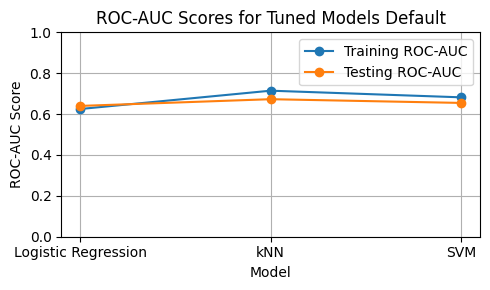

                    ---RandomSearchCV---                    


,Tuned Logistic Regression,Tuned kNN,Tuned SVM
Training ROC-AUC,0.617314,0.68738,0.619373
Testing ROC-AUC,0.629212,0.65356,0.636367


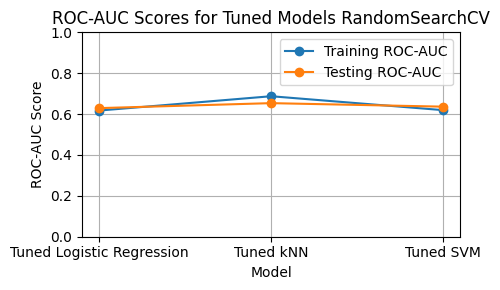

                     ---GridSearchCV---                     


,Tuned Logistic Regression,Tuned kNN,Tuned SVM
Training ROC-AUC,0.616061,0.68738,0.585904
Testing ROC-AUC,0.618474,0.65356,0.59807


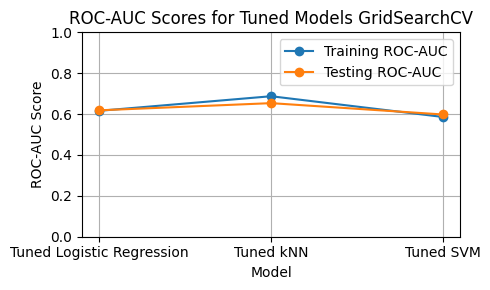

In [181]:
for i in range(3):
    if i == 0 :
        model = df_model_roc_auc
        type = "Default"
    elif i == 1 :
        model = model_tuning_random
        type = "RandomSearchCV"
    elif i == 2 :
        model = model_tuning_grid
        type = "GridSearchCV"

    print(f"---{type}---".center(60))
    display(model)
    # Plotting ROC-AUC scores
    plt.figure(figsize=(5, 3))

    # Plot training ROC-AUC
    plt.plot(model.columns, model.loc['Training ROC-AUC'], marker='o', label='Training ROC-AUC')

    # Plot testing ROC-AUC
    plt.plot(model.columns, model.loc['Testing ROC-AUC'], marker='o', label='Testing ROC-AUC')

    # Adding labels and title
    plt.title(f'ROC-AUC Scores for Tuned Models {type}')
    plt.xlabel('Model')
    plt.ylabel('ROC-AUC Score')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.legend()
    plt.grid(True)
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show plot
    plt.tight_layout()
    plt.show()


**Kesimpulan :** Pada parameter default memang memiliki hasil ROC-AUC yang tinggi, tetapi tidak menggunakan cross validation sehingga belum tentu model yang dihasilkan stabil. Berdasarkan RandomSearch dan GridSearch model terbaik yaitu KNN yang memiliki akurasi ROC-AUC Train 0.69 dan di Test 0.65. Sekalipun memiliki selisih kurang lebih 0.4, tetapi ini tidak signifikan.

# **Model Saving**

In [182]:
best_pipe_grid_knn = best_pipe_grid[1]

pickle.dump(best_pipe_grid_knn, open('model_knn_tuned.pkl', 'wb'))

# **Model Inference**

In [183]:
X_train_selected.head(2)

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2091,3,0,0,0,0,-1,-1,150000,8000.0,2000.0,1000.0,759,0.0,0.0
1880,2,2,2,2,2,2,2,60000,3200.0,2400.0,12.0,3200,1619.0,0.0


In [188]:
data_inf = {
    'education_level' : [2,3],
     'pay_0' : [0,2],
     'pay_2' : [2,0],
     'pay_3' : [2,-1],
     'pay_4' : [2,2],
     'pay_5' : [-1,2],
     'pay_6' : [2,-1],
     'limit_balance' : [50000, 40000],
     'pay_amt_1' : [2000,2859],
     'pay_amt_2' : [3000,1452],
     'pay_amt_3' : [3000,1190],
     'pay_amt_4' : [6000,543],
     'pay_amt_5' : [2000,920],
     'pay_amt_6' : [2000,534]
}

df_inf = pd.DataFrame(data_inf)

Predict

In [191]:
# Load model & Preprocessing
with open('model_knn_tuned.pkl', 'rb') as file1 :
    model_knn_tuned = joblib.load(file1)

In [192]:
hasil_pred = model_knn_tuned.predict(df_inf)

In [193]:
df_hasil_pred = pd.DataFrame({"pred_charges" : hasil_pred})
df_hasil_pred

,pred_charges
0,0
1,1


In [195]:
df_inf_final = pd.concat([df_inf, df_hasil_pred], axis=1)
df_inf_final

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pred_charges
0,2,0,2,2,2,-1,2,50000,2000,3000,3000,6000,2000,2000,0
1,3,2,0,-1,2,2,-1,40000,2859,1452,1190,543,920,534,1


Model sudah mampu memprediksi dari data yang diberikan, dimana untuk data pertama menghasilkan prediksi 0(no) atau orang tersebut membayar dan untuk data ke dua menghasilkan prediksi 1(yes) atau orang tersebut tidak membayar.